In [2]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [3]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [4]:
job_params = {
    'subjects_dir' :   '/mnt/zinu-data/ALI-NY/ALI-A4/TO_ARCHIVE_04_18', #/AH009/2022-04-15',
    'subject' :        'AH009',
    'date' :           '2022-04-15',
    'expnum' :         [1,2,3],
    'planes' :         n.arange(0,30),
    
    'notch_filt' :      {'f0' : 200, 'Q' : 5},
    
    'n_init_files' :   3,
    'init_file_pool' : None,
    'init_file_sample_method': 'random',
    
    'subtract_crosstalk' : True,
    'override_crosstalk' : None,
    'crosstalk_n_planes' : 10, 
    
    'nonrigid' : True,
    'smooth_sigma' : 1.15,
    'maxregshift' : 0.15,
    'reg_filter_pcorr' : 1,
    'generate_sample_registered_bins' : False,

    'dtype' : n.float32,
    'tif_batch_size' : 1,
}



In [5]:
tifs, si_params, exp_str = flu.find_exp(job_params['subjects_dir'], job_params['subject'],
                                        job_params['date'], job_params['expnum'])

In [6]:
job_params['fs'] = si_params['vol_rate']
job_params['fs'] = si_params['vol_rate']
job_params['notch_filt']['line_freq'] = si_params['line_freq']

In [7]:
# Create the job
job = Job('/mnt/md0/runs',exp_str, tifs = tifs,
          params=job_params, create=False, overwrite=True, verbosity = 3)

   Found and loaded params from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/params.npy


In [8]:
# tifs_nofilt = lbmio.load_and_stitch_tifs(job.tifs[:2], planes = n.arange(10),filt=None)
# tifs_filt = lbmio.load_and_stitch_tifs(job.tifs[:2], planes=n.arange(10), filt = job_params['notch_filt'])

In [9]:
# v = napari.view_image(tifs_nofilt, name='no filt')
# v.add_image(tifs_filt, name='filt')

In [10]:
# optional parameters for initialization
# load 1 file to initialize, and select 200 frames randomly to do initalization on
job.params['n_init_files'] = 3
job.params['init_n_frames'] = None


In [11]:
# %%time
# summary = job.run_init_pass()

In [12]:
# job.show_summary_plots()

In [13]:
summary = job.load_summary()

In [14]:
# job.save_frame_counts()

   /mnt/zinu-data/ALI-NY/ALI-A4/TO_ARCHIVE_04_18/AH009/2022-04-15/1/AH009_ROI3p33um_-um_00001_00001.tif is 100 frames and 7463085344 bytes
   /mnt/zinu-data/ALI-NY/ALI-A4/TO_ARCHIVE_04_18/AH009/2022-04-15/1/AH009_ROI3p33um_-um_00001_00052.tif is 21 frames and 1567264784 bytes
   /mnt/zinu-data/ALI-NY/ALI-A4/TO_ARCHIVE_04_18/AH009/2022-04-15/2/AH009_ROI3p33um_-um_00001_00001.tif is 100 frames and 7463085348 bytes
   /mnt/zinu-data/ALI-NY/ALI-A4/TO_ARCHIVE_04_18/AH009/2022-04-15/2/AH009_ROI3p33um_-um_00001_00034.tif is 73 frames and 5448058068 bytes
   /mnt/zinu-data/ALI-NY/ALI-A4/TO_ARCHIVE_04_18/AH009/2022-04-15/3/AH009_ROI3p33um_-um_00001_00001.tif is 100 frames and 7463085352 bytes
   /mnt/zinu-data/ALI-NY/ALI-A4/TO_ARCHIVE_04_18/AH009/2022-04-15/3/AH009_ROI3p33um_-um_00001_00035.tif is 21 frames and 1567264792 bytes


(array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,  21,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100,  73, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100,  21]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 

In [15]:
# split the large tiffs into files of size 100 after registration
job.params['split_tif_size'] = 100

In [16]:
# # %%time
# job.register_gpu()

In [17]:
mov_full = job.get_registered_movie('registered_fused_data', 'fused')
im_full = mov_full[:,:200].mean(axis=1).compute()

In [18]:
# find crop values that minimize dark zones - check planes 0 and 15 in the following cell to 
# make sure you're not cutting out parts of the brain
crop = ((0,18), (50,1200), (0, 950))

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f37cc04fbb0>)

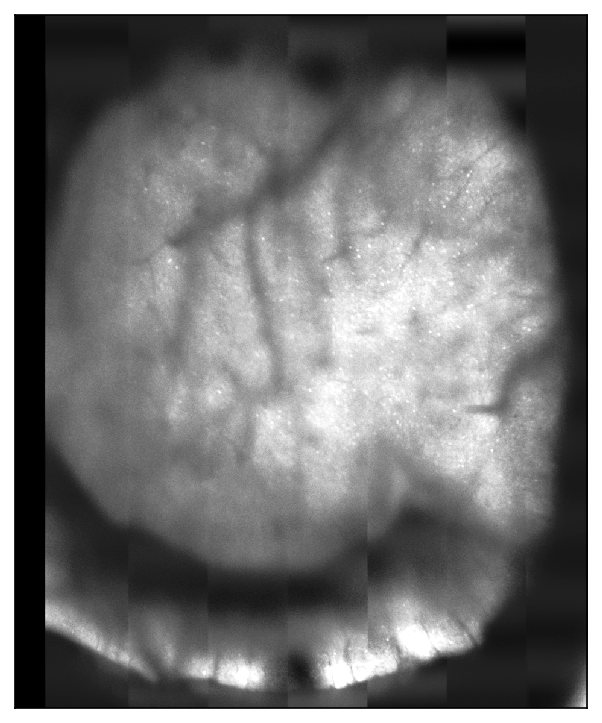

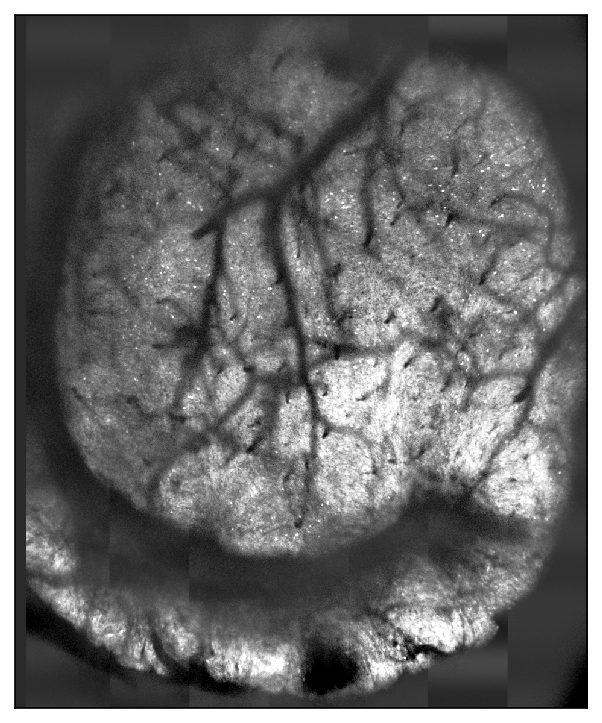

In [19]:
tfu.show_tif(im_full[0,crop[1][0]:crop[1][1], crop[2][0]:crop[2][1]])
tfu.show_tif(im_full[15,crop[1][0]:crop[1][1], crop[2][0]:crop[2][1]])

In [20]:
# number of SVD components to use when calculating the correlation map
# lower number means more denoising, but if it's too low you will start losing cells!
# This can't be larger than the number of svd components you used in the decomposition above
job.params['n_svd_comp'] = 50

# spatial filter sizes for neuropil subtraction, and cell detection
# npil_filt is a low_pass filter that attempts to remove any features larger than the filter size (neuropil!)
# conv_filt_xy is a high_pass filter that amplifies any features that are smaller than ~2x the filter size (cells!)
# these values worked well for me with ~4um xy pixel spacing and ~15 um z pixel spacing, for detecting mouse somata
# When you change resolution, or if you're trying to detect smaller things, you will need to adjust these values
# because the units here are _pixels_, not microns!
job.params['conv_filt_type'] = 'gaussian'
job.params['conv_filt_xy'] = 1.0
job.params['conv_filt_z'] = 1.0
job.params['npil_filt_type'] = 'unif'
job.params['npil_filt_xy'] = 8.0
job.params['npil_filt_z']=  1.5

# normalization exponent, should be around 1. 
# If you find blood vessels or the background being too bright in the correlation map, reduce it to ~0.7-0.8! 
job.params['sdnorm_exp']= 0.8

# threshold applied to the normalized, filtered movie before it is accumulated into the correlation map
# if you increase it, the background will become darker (which is good!), however at some point you will
# start excluding dimmer cells (which is bad!)
job.params['intensity_thresh'] : 0.4

## Compute parameters 
# number of frames to compute at one iteration 
# (any value above ~100-200 shouldn't affect results, 
# decrease if you have RAM issues or if SVD reconstruction gets stuck on "Sending all blocks to dask to compute")
job.params['t_batch_size'] = 300
# number of processors to use when calculating the correlation map
job.params['n_proc_corr'] = 70
# number of frames per smaller batch within the batch, should be ~t_batch_size / n_proc_corr, but above ~5
job.params['mproc_batchsize'] = 5


In [21]:
mov_crop = mov_full[crop[0][0]:crop[0][1], :, crop[1][0]:crop[1][1], crop[2][0]:crop[2][1]]

In [22]:
# save retinotopy movie separately to move to zeytin
idx0, idx1 = (0,5121)
retinotopy_dir = job.make_new_dir('retinotopy_data')

      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/retinotopy_data with tag retinotopy_data


In [23]:
# n.save(os.path.join(retinotopy_dir,'plane_10.npy'), mov_crop[10][idx0:idx1].compute())

In [25]:
# mean_mov_crop = mov_crop[0:13,idx0:idx1].mean(axis=0)

# %%time
# xx = mean_mov_crop.compute()


# n.save(os.path.join(retinotopy_dir,'plane_mean.npy'), xx)

In [ ]:
# Pick the parameters you want to sweep, and enter them in the tuples.
# It will do all combinations of parameters, so if you have many parameters it will be many combinations! 
job.params['t_batch_size'] = 300
params_to_sweep = {
    'intensity_thresh' : (0.5,),
    'n_svd_comp' : (50,), # if you have multiple values here, make sure you pass mov=svd_info
    'conv_filt_xy': (1.0, 1.5, 2.0),
    'npil_filt_xy': (8.0,11.0,14.0),
    'conv_filt_z' : (1.5,),
    'npil_filt_z' : (1.0,),
    'sdnorm_exp' : (0.8, )
}

# sweep_summary = job.sweep_params(params_to_sweep, mov = mov_crop,testing_dir_tag='sweep-nosvd-2',
#                            do_vmap=True, all_combinations=True, n_test_iters = 1)
# use this to access older sweep results
# sweep_summary = n.load(os.path.join(job.dirs['sweep-full'], 'sweep_summary.npy'),allow_pickle=True).item()


In [ ]:
job.vis_vmap_sweep(sweep_summary)

In [ ]:
job.params['conv_filt_xy'] = 2.0
job.params['intensity_thresh'] : 0.5
job.params['npil_filt_xy'] = 14.0

In [ ]:
%%time
# uncomment below to load svd_info for and svd you did earlier if you are re-running this notebook
# svd_info = n.load(os.path.join(job.dirs['svd_cropped'], 'svd_info.npy'), allow_pickle=True).item()
(vmap, mean_img, max_img), __, __ = job.calculate_corr_map(mov = mov_crop)

In [20]:
vmap = job.load_iter_results(-1)['vmap']

   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039


In [33]:
napari.view_image(vmap)

Viewer(camera=Camera(center=(0.0, 574.5, 474.5), zoom=0.42067438223334375, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(8.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 18.0, 1.0), (0.0, 1150.0, 1.0), (0.0, 950.0, 1.0)), current_step=(8, 574, 474), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'vmap' at 0x7f2c606288b0>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x7f2fecf8a9d0>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

In [28]:
%%time
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 27.0

job.params['activity_thresh'] = 20.0
job.params['percentile'] = 99.0
job.params['extend_thresh'] = 0.05
job.params['max_iter'] = 10000 # maximum number of ROIs detected in given patch
combined_dir = job.patch_and_detect(combined_name='combined-full')

   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
120 blocks with overlap (80 without, 1.50x increase)
120 blocks with overlap (80 without, 1.50x increase)
   Detecting from patch: 0/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0000 with tag patch-0000
   Running cell detection on patch 0000 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0000, max 10000 iters
   Patch bounds are [ 0 18], [  0 120], [  0 120]
   Cell center bounds are [ 0 18], [  0 106], [  0 106]
   Time bounds are (None, None)
mov_sub
   Loading 11.51 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0000
   Loading movie patch to shared memory
   Starting ext

      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0006
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0006/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0006/iscell.npy
   Detecting from patch: 7/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0007 with tag patch-0007
   Running cell detection on patch 0007 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0007, max 10000 iters
   Patch bounds are [ 0 18], [  0 120], [645 765]
   Cell center bounds are [ 0 18], [  0 106], [659 751]
   Time boun

   Iter 0000: running 01 ROIs in parallel
      Added cell 1 at 16, 179, 233, peak: 27.042, thresh: 8.155, 178 frames, 38 pixels
      Iter 0001: peak is too small  - ending extraction
   Found 1 cells in 1 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0012/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0012/iscell.npy
   Detecting from patch: 13/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0013 with tag patch-0013
   Running cell detection on patch 0013 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0013, max 10000 iters
   Patch bounds are [ 0 18], [ 93 213], [276 396]
   Cell center bounds are [ 0 18], [106 200], [290 382]
   Time bounds are (None, None)
mov_sub
   Loading 11.51 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH

      Added cell 9 at 17, 158, 723, peak: 34.152, thresh: 9.303, 188 frames, 44 pixels
      Added cell 10 at 10, 198, 667, peak: 33.311, thresh: 7.742, 280 frames, 212 pixels
      Added cell 11 at 17, 192, 747, peak: 32.666, thresh: 10.761, 166 frames, 30 pixels
      Added cell 12 at 17, 182, 683, peak: 32.220, thresh: 8.272, 190 frames, 55 pixels
      Added cell 13 at 06, 194, 675, peak: 30.867, thresh: 8.632, 205 frames, 116 pixels
      Added cell 14 at 09, 157, 723, peak: 29.859, thresh: 8.515, 178 frames, 69 pixels
      Added cell 15 at 12, 193, 723, peak: 29.376, thresh: 8.056, 188 frames, 109 pixels
      Added cell 16 at 06, 179, 703, peak: 29.161, thresh: 7.192, 227 frames, 82 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 04, 182, 675, peak: 29.125, thresh: 7.147, 234 frames, 116 pixels
      Added cell 18 at 10, 191, 736, peak: 28.841, thresh: 8.393, 171 frames, 70 pixels
      Added cell 19 at 07, 187, 719, peak: 28.379, thresh: 7.041, 204 fram

   Found 24 cells in 3 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0020/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0020/iscell.npy
   Detecting from patch: 21/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0021 with tag patch-0021
   Running cell detection on patch 0021 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0021, max 10000 iters
   Patch bounds are [ 0 18], [187 307], [ 92 212]
   Cell center bounds are [ 0 18], [200 293], [106 198]
   Time bounds are (None, None)
mov_sub
   Loading 11.51 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0021
   Loading 

      Added cell 62 at 09, 272, 214, peak: 28.216, thresh: 7.198, 285 frames, 304 pixels
      Added cell 63 at 02, 247, 254, peak: 27.922, thresh: 7.063, 184 frames, 77 pixels
      Added cell 64 at 01, 248, 287, peak: 27.320, thresh: 7.506, 159 frames, 69 pixels
   Iter 0008: running 03 ROIs in parallel
      Added cell 65 at 10, 280, 267, peak: 27.218, thresh: 7.140, 165 frames, 169 pixels
      Added cell 66 at 02, 291, 233, peak: 27.116, thresh: 6.689, 158 frames, 21 pixels
      Added cell 67 at 03, 285, 224, peak: 27.058, thresh: 6.779, 196 frames, 90 pixels
      Iter 0009: peak is too small  - ending extraction
   Found 67 cells in 9 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0022/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0022/iscell.npy
   Detecting from patch: 23/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
    

   Found 69 cells in 9 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0023/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0023/iscell.npy
   Detecting from patch: 24/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0024 with tag patch-0024
   Running cell detection on patch 0024 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0024, max 10000 iters
   Patch bounds are [ 0 18], [187 307], [368 488]
   Cell center bounds are [ 0 18], [200 293], [382 474]
   Time bounds are (None, None)
mov_sub
   Loading 11.51 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0024
   Loading 

   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0026
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 10, 253, 570, peak: 47.651, thresh: 8.916, 505 frames, 265 pixels
      Added cell 2 at 07, 267, 619, peak: 40.112, thresh: 8.808, 393 frames, 111 pixels
      Added cell 3 at 10, 265, 641, peak: 39.973, thresh: 10.662, 228 frames, 134 pixels
      Added cell 4 at 05, 290, 614, peak: 38.525, thresh: 8.434, 363 frames, 148 pixels
      Added cell 5 at 07, 224, 652, peak: 38.352, thresh: 7.672, 344 frames, 149 pixels
      Added cell 6 at 06, 268, 641, peak: 36.984, thresh: 9.538, 257 frames, 162 pixels
      Added cell 7 at 10, 251, 644, peak: 36.743, thresh: 9.233, 215 frames, 152 pixels
      Added cell 8

      Added cell 33 at 10, 253, 711, peak: 33.970, thresh: 7.544, 292 frames, 212 pixels
      Added cell 34 at 16, 238, 694, peak: 32.646, thresh: 8.742, 249 frames, 85 pixels
      Added cell 35 at 17, 258, 747, peak: 32.537, thresh: 9.122, 194 frames, 27 pixels
      Added cell 36 at 08, 277, 724, peak: 32.443, thresh: 7.520, 237 frames, 142 pixels
      Added cell 37 at 09, 259, 691, peak: 32.241, thresh: 7.557, 367 frames, 293 pixels
      Added cell 38 at 00, 266, 750, peak: 32.195, thresh: 7.523, 210 frames, 71 pixels
      Added cell 39 at 08, 283, 716, peak: 31.938, thresh: 7.966, 244 frames, 118 pixels
      Added cell 40 at 05, 246, 681, peak: 31.769, thresh: 7.690, 197 frames, 134 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 10, 208, 688, peak: 31.651, thresh: 7.520, 243 frames, 198 pixels
      Added cell 42 at 09, 215, 663, peak: 31.449, thresh: 7.539, 256 frames, 260 pixels
      Added cell 43 at 08, 208, 678, peak: 31.269, thresh: 7.769, 285 f

      Added cell 23 at 17, 259, 817, peak: 36.620, thresh: 7.600, 581 frames, 84 pixels
      Added cell 24 at 10, 276, 798, peak: 36.589, thresh: 8.213, 324 frames, 247 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 17, 204, 822, peak: 36.517, thresh: 9.393, 214 frames, 74 pixels
      Added cell 26 at 07, 227, 768, peak: 36.501, thresh: 7.963, 332 frames, 192 pixels
      Added cell 27 at 04, 247, 751, peak: 36.400, thresh: 7.595, 327 frames, 166 pixels
      Added cell 28 at 17, 214, 830, peak: 36.356, thresh: 9.097, 231 frames, 49 pixels
      Added cell 29 at 02, 236, 752, peak: 36.074, thresh: 7.707, 305 frames, 150 pixels
      Added cell 30 at 07, 274, 840, peak: 36.063, thresh: 8.324, 273 frames, 189 pixels
      Added cell 31 at 05, 288, 795, peak: 35.865, thresh: 8.201, 254 frames, 185 pixels
      Added cell 32 at 06, 288, 802, peak: 34.709, thresh: 8.716, 235 frames, 128 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 06, 23

   Found 5 cells in 1 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0029/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0029/iscell.npy
   Detecting from patch: 30/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0030 with tag patch-0030
   Running cell detection on patch 0030 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0030, max 10000 iters
   Patch bounds are [ 0 18], [280 400], [  0 120]
   Cell center bounds are [ 0 18], [293 387], [  0 106]
   Time bounds are (None, None)
mov_sub
   Loading 11.51 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0030
   Loading m

      Added cell 9 at 06, 327, 255, peak: 50.226, thresh: 11.741, 342 frames, 304 pixels
      Added cell 10 at 06, 386, 235, peak: 46.283, thresh: 9.934, 375 frames, 236 pixels
      Added cell 11 at 03, 341, 284, peak: 44.606, thresh: 9.112, 413 frames, 150 pixels
      Added cell 12 at 05, 335, 268, peak: 43.918, thresh: 8.925, 391 frames, 248 pixels
      Added cell 13 at 02, 300, 253, peak: 43.354, thresh: 10.328, 342 frames, 108 pixels
      Added cell 14 at 10, 376, 259, peak: 42.994, thresh: 10.722, 309 frames, 249 pixels
      Added cell 15 at 06, 315, 245, peak: 41.751, thresh: 8.408, 441 frames, 270 pixels
      Added cell 16 at 05, 315, 284, peak: 40.636, thresh: 9.442, 441 frames, 322 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 09, 386, 269, peak: 40.542, thresh: 7.356, 772 frames, 324 pixels
      Added cell 18 at 05, 305, 233, peak: 40.283, thresh: 9.032, 536 frames, 291 pixels
      Added cell 19 at 04, 347, 208, peak: 39.952, thresh: 8.848, 

      Added cell 97 at 06, 360, 205, peak: 27.156, thresh: 7.345, 181 frames, 113 pixels
      Added cell 98 at 02, 383, 248, peak: 27.044, thresh: 6.503, 148 frames, 28 pixels
      Added cell 99 at 10, 300, 229, peak: 27.039, thresh: 7.667, 200 frames, 158 pixels
      Iter 0013: peak is too small  - ending extraction
   Found 99 cells in 13 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0032/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0032/iscell.npy
   Detecting from patch: 33/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0033 with tag patch-0033
   Running cell detection on patch 0033 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0033, max 10000 iters
   Patch bounds are [ 0 18], [280 400], [276 396]
   Cell center bounds are [ 0 18], [293

      Added cell 6 at 07, 366, 382, peak: 37.552, thresh: 7.133, 998 frames, 275 pixels
      Added cell 7 at 04, 362, 430, peak: 37.387, thresh: 7.984, 430 frames, 180 pixels
      Added cell 8 at 04, 373, 438, peak: 36.208, thresh: 7.779, 376 frames, 196 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 03, 355, 417, peak: 34.532, thresh: 7.761, 372 frames, 162 pixels
      Added cell 10 at 02, 382, 421, peak: 33.075, thresh: 7.769, 287 frames, 133 pixels
      Added cell 11 at 02, 351, 382, peak: 32.267, thresh: 8.444, 235 frames, 89 pixels
      Added cell 12 at 10, 338, 398, peak: 30.544, thresh: 7.328, 186 frames, 189 pixels
      Added cell 13 at 12, 368, 389, peak: 30.336, thresh: 7.413, 251 frames, 117 pixels
      Added cell 14 at 09, 376, 460, peak: 30.335, thresh: 7.059, 298 frames, 230 pixels
      Added cell 15 at 10, 345, 382, peak: 30.285, thresh: 7.698, 220 frames, 146 pixels
      Added cell 16 at 07, 358, 397, peak: 30.278, thresh: 7.550, 277 fra

      Added cell 53 at 05, 324, 506, peak: 32.457, thresh: 8.210, 221 frames, 175 pixels
      Added cell 54 at 10, 318, 554, peak: 32.454, thresh: 8.347, 224 frames, 201 pixels
      Added cell 55 at 17, 304, 533, peak: 32.222, thresh: 9.101, 151 frames, 24 pixels
      Added cell 56 at 08, 306, 555, peak: 32.181, thresh: 7.041, 432 frames, 348 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 07, 337, 529, peak: 31.940, thresh: 7.746, 198 frames, 64 pixels
      Added cell 58 at 15, 296, 524, peak: 31.895, thresh: 10.339, 165 frames, 33 pixels
      Added cell 59 at 00, 301, 512, peak: 31.894, thresh: 7.512, 234 frames, 73 pixels
      Added cell 60 at 06, 376, 529, peak: 31.755, thresh: 8.817, 194 frames, 94 pixels
      Added cell 61 at 02, 340, 511, peak: 31.174, thresh: 7.346, 497 frames, 54 pixels
      Added cell 62 at 02, 305, 496, peak: 30.920, thresh: 8.481, 186 frames, 70 pixels
      Added cell 63 at 00, 381, 509, peak: 30.907, thresh: 7.365, 223 fram

      Added cell 9 at 06, 376, 622, peak: 55.890, thresh: 11.429, 533 frames, 127 pixels
      Added cell 10 at 03, 374, 595, peak: 55.834, thresh: 9.397, 722 frames, 214 pixels
      Added cell 11 at 07, 304, 622, peak: 55.219, thresh: 9.613, 630 frames, 329 pixels
      Added cell 12 at 02, 377, 606, peak: 49.358, thresh: 12.291, 284 frames, 93 pixels
      Added cell 13 at 08, 370, 658, peak: 49.111, thresh: 11.851, 345 frames, 125 pixels
      Added cell 14 at 06, 350, 630, peak: 47.971, thresh: 13.196, 262 frames, 124 pixels
      Added cell 15 at 06, 338, 618, peak: 47.333, thresh: 10.596, 391 frames, 131 pixels
      Added cell 16 at 04, 346, 586, peak: 47.300, thresh: 11.048, 363 frames, 172 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 11, 342, 649, peak: 47.220, thresh: 11.571, 347 frames, 100 pixels
      Added cell 18 at 06, 361, 651, peak: 47.064, thresh: 10.926, 408 frames, 229 pixels
      Added cell 19 at 07, 323, 613, peak: 46.984, thresh: 11.

      Added cell 97 at 02, 358, 632, peak: 29.404, thresh: 7.782, 174 frames, 129 pixels
      Added cell 98 at 04, 326, 602, peak: 29.156, thresh: 7.274, 197 frames, 73 pixels
      Added cell 99 at 05, 375, 619, peak: 29.133, thresh: 6.628, 296 frames, 75 pixels
      Added cell 100 at 03, 358, 644, peak: 29.122, thresh: 7.720, 187 frames, 127 pixels
      Added cell 101 at 17, 326, 615, peak: 29.030, thresh: 8.942, 163 frames, 31 pixels
      Added cell 102 at 00, 377, 633, peak: 28.949, thresh: 7.615, 209 frames, 65 pixels
      Added cell 103 at 00, 333, 631, peak: 28.934, thresh: 7.334, 181 frames, 52 pixels
      Added cell 104 at 15, 358, 567, peak: 28.873, thresh: 8.016, 542 frames, 65 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 04, 386, 625, peak: 28.758, thresh: 6.671, 872 frames, 97 pixels
      Added cell 106 at 16, 351, 644, peak: 28.718, thresh: 9.703, 191 frames, 37 pixels
      Added cell 107 at 06, 386, 623, peak: 28.588, thresh: 6.908, 18

      Added cell 46 at 07, 383, 750, peak: 33.968, thresh: 9.030, 309 frames, 172 pixels
      Added cell 47 at 09, 313, 696, peak: 33.768, thresh: 8.726, 272 frames, 201 pixels
      Added cell 48 at 05, 321, 741, peak: 33.526, thresh: 8.880, 283 frames, 111 pixels
   Iter 0006: running 08 ROIs in parallel
      Added cell 49 at 01, 343, 691, peak: 32.955, thresh: 7.796, 214 frames, 84 pixels
      Added cell 50 at 17, 372, 674, peak: 32.930, thresh: 9.274, 160 frames, 68 pixels
      Added cell 51 at 17, 345, 712, peak: 32.894, thresh: 6.996, 327 frames, 72 pixels
      Added cell 52 at 00, 386, 692, peak: 32.638, thresh: 7.356, 264 frames, 83 pixels
      Added cell 53 at 17, 350, 722, peak: 32.405, thresh: 8.199, 182 frames, 52 pixels
      Added cell 54 at 02, 367, 678, peak: 32.016, thresh: 7.442, 251 frames, 118 pixels
      Added cell 55 at 00, 379, 683, peak: 31.859, thresh: 7.062, 270 frames, 94 pixels
      Added cell 56 at 06, 386, 733, peak: 31.851, thresh: 8.391, 274 fram

      Added cell 17 at 07, 351, 811, peak: 36.741, thresh: 8.951, 259 frames, 142 pixels
      Added cell 18 at 01, 293, 751, peak: 36.399, thresh: 8.397, 607 frames, 73 pixels
      Added cell 19 at 03, 383, 759, peak: 35.594, thresh: 8.546, 299 frames, 144 pixels
      Added cell 20 at 07, 322, 773, peak: 34.942, thresh: 8.756, 241 frames, 121 pixels
      Added cell 21 at 10, 327, 807, peak: 34.702, thresh: 7.843, 351 frames, 257 pixels
      Added cell 22 at 07, 383, 751, peak: 34.135, thresh: 9.317, 285 frames, 153 pixels
      Added cell 23 at 06, 311, 781, peak: 33.673, thresh: 8.687, 283 frames, 110 pixels
      Added cell 24 at 16, 379, 839, peak: 33.396, thresh: 9.264, 211 frames, 44 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 08, 310, 817, peak: 32.790, thresh: 6.665, 563 frames, 367 pixels
      Added cell 26 at 07, 348, 826, peak: 32.183, thresh: 7.026, 337 frames, 289 pixels
      Added cell 27 at 03, 337, 799, peak: 31.784, thresh: 8.106, 209 

      Added cell 21 at 03, 407, 039, peak: 28.123, thresh: 7.264, 1286 frames, 187 pixels
      Added cell 22 at 03, 413, 039, peak: 28.013, thresh: 7.559, 1324 frames, 260 pixels
      Added cell 23 at 03, 480, 039, peak: 27.952, thresh: 8.143, 1161 frames, 220 pixels
      Added cell 24 at 01, 396, 046, peak: 27.860, thresh: 7.983, 1209 frames, 228 pixels
      Iter 0003: peak is too small  - ending extraction
   Found 24 cells in 3 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0040/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0040/iscell.npy
   Detecting from patch: 41/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0041 with tag patch-0041
   Running cell detection on patch 0041 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0041, max 10000 it

      Added cell 31 at 03, 402, 281, peak: 45.559, thresh: 10.007, 416 frames, 125 pixels
      Added cell 32 at 09, 455, 250, peak: 44.819, thresh: 10.497, 261 frames, 175 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 06, 463, 210, peak: 43.511, thresh: 11.920, 228 frames, 76 pixels
      Added cell 34 at 06, 412, 240, peak: 43.083, thresh: 10.212, 283 frames, 189 pixels
      Added cell 35 at 06, 464, 233, peak: 43.025, thresh: 9.563, 357 frames, 197 pixels
      Added cell 36 at 04, 406, 268, peak: 42.788, thresh: 8.795, 385 frames, 328 pixels
      Added cell 37 at 04, 411, 289, peak: 42.027, thresh: 7.879, 1241 frames, 189 pixels
      Added cell 38 at 17, 469, 237, peak: 41.831, thresh: 12.678, 155 frames, 58 pixels
      Added cell 39 at 15, 443, 248, peak: 41.711, thresh: 15.647, 154 frames, 42 pixels
      Added cell 40 at 02, 441, 227, peak: 41.520, thresh: 10.748, 234 frames, 129 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 a

      Added cell 121 at 11, 430, 268, peak: 30.109, thresh: 7.146, 236 frames, 341 pixels
      Added cell 122 at 07, 398, 278, peak: 29.825, thresh: 6.620, 289 frames, 283 pixels
      Added cell 123 at 17, 455, 198, peak: 29.803, thresh: 7.685, 261 frames, 51 pixels
      Added cell 124 at 02, 448, 246, peak: 29.794, thresh: 6.932, 224 frames, 105 pixels
      Added cell 125 at 06, 423, 230, peak: 29.779, thresh: 8.043, 200 frames, 49 pixels
      Added cell 126 at 08, 388, 261, peak: 29.758, thresh: 7.478, 210 frames, 107 pixels
      Added cell 127 at 16, 405, 198, peak: 29.745, thresh: 8.362, 276 frames, 57 pixels
      Added cell 128 at 00, 408, 255, peak: 29.706, thresh: 7.076, 174 frames, 72 pixels
   Iter 0016: running 08 ROIs in parallel
      Added cell 129 at 09, 397, 254, peak: 29.687, thresh: 6.610, 139 frames, 35 pixels
      Added cell 130 at 04, 429, 259, peak: 29.685, thresh: 6.711, 198 frames, 97 pixels
      Added cell 131 at 02, 388, 246, peak: 29.573, thresh: 6.79

   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0043
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 10, 409, 375, peak: 71.158, thresh: 15.657, 318 frames, 107 pixels
      Added cell 2 at 03, 439, 357, peak: 64.014, thresh: 14.534, 460 frames, 107 pixels
      Added cell 3 at 05, 450, 367, peak: 63.079, thresh: 14.975, 456 frames, 110 pixels
      Added cell 4 at 05, 408, 365, peak: 61.486, thresh: 12.128, 524 frames, 123 pixels
      Added cell 5 at 05, 411, 292, peak: 59.388, thresh: 10.853, 623 frames, 169 pixels
      Added cell 6 at 06, 390, 368, peak: 57.958, thresh: 13.838, 262 frames, 153 pixels
      Added cell 7 at 06, 472, 361, peak: 56.264, thresh: 12.396, 414 frames, 299 pixels
      Added 

      Added cell 86 at 05, 472, 369, peak: 29.699, thresh: 8.336, 157 frames, 160 pixels
      Added cell 87 at 06, 394, 361, peak: 29.589, thresh: 7.872, 173 frames, 64 pixels
      Added cell 88 at 10, 402, 381, peak: 29.573, thresh: 6.612, 683 frames, 142 pixels
   Iter 0011: running 08 ROIs in parallel
      Added cell 89 at 09, 389, 381, peak: 29.516, thresh: 6.963, 1342 frames, 261 pixels
      Added cell 90 at 08, 410, 365, peak: 29.365, thresh: 6.715, 347 frames, 266 pixels
      Added cell 91 at 10, 413, 302, peak: 29.350, thresh: 7.708, 201 frames, 100 pixels
      Added cell 92 at 00, 450, 368, peak: 29.327, thresh: 6.776, 384 frames, 117 pixels
      Added cell 93 at 16, 478, 375, peak: 29.291, thresh: 8.486, 159 frames, 59 pixels
      Added cell 94 at 01, 413, 374, peak: 29.280, thresh: 7.375, 207 frames, 106 pixels
      Added cell 95 at 04, 448, 369, peak: 29.204, thresh: 6.519, 355 frames, 141 pixels
      Added cell 96 at 09, 420, 367, peak: 29.201, thresh: 6.875, 228

      Added cell 31 at 03, 406, 441, peak: 37.272, thresh: 8.638, 322 frames, 222 pixels
      Added cell 32 at 10, 458, 441, peak: 37.195, thresh: 9.285, 207 frames, 149 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 08, 446, 421, peak: 36.918, thresh: 7.451, 545 frames, 230 pixels
      Added cell 34 at 03, 468, 389, peak: 36.812, thresh: 8.880, 345 frames, 140 pixels
      Added cell 35 at 03, 458, 438, peak: 36.548, thresh: 8.373, 443 frames, 137 pixels
      Added cell 36 at 04, 408, 473, peak: 36.420, thresh: 8.728, 369 frames, 158 pixels
      Added cell 37 at 08, 397, 458, peak: 36.035, thresh: 7.939, 309 frames, 266 pixels
      Added cell 38 at 03, 477, 468, peak: 35.506, thresh: 7.808, 411 frames, 139 pixels
      Added cell 39 at 01, 440, 464, peak: 34.573, thresh: 7.685, 319 frames, 115 pixels
      Added cell 40 at 02, 422, 444, peak: 34.467, thresh: 9.292, 274 frames, 124 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 05,

      Added cell 9 at 02, 475, 530, peak: 50.414, thresh: 11.909, 334 frames, 107 pixels
      Added cell 10 at 02, 401, 507, peak: 47.606, thresh: 10.264, 330 frames, 93 pixels
      Added cell 11 at 05, 473, 556, peak: 47.176, thresh: 9.375, 486 frames, 146 pixels
      Added cell 12 at 06, 450, 485, peak: 44.481, thresh: 8.492, 454 frames, 301 pixels
      Added cell 13 at 03, 477, 485, peak: 42.891, thresh: 9.301, 385 frames, 136 pixels
      Added cell 14 at 04, 430, 533, peak: 42.084, thresh: 9.736, 301 frames, 104 pixels
      Added cell 15 at 15, 465, 548, peak: 41.921, thresh: 15.418, 171 frames, 62 pixels
      Added cell 16 at 02, 426, 529, peak: 41.854, thresh: 9.214, 410 frames, 130 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 07, 424, 566, peak: 40.770, thresh: 8.589, 530 frames, 139 pixels
      Added cell 18 at 03, 471, 544, peak: 40.125, thresh: 8.860, 430 frames, 97 pixels
      Added cell 19 at 04, 463, 566, peak: 39.987, thresh: 8.195, 485

      Added cell 97 at 03, 392, 516, peak: 27.946, thresh: 6.574, 188 frames, 46 pixels
      Added cell 98 at 04, 469, 558, peak: 27.724, thresh: 6.485, 141 frames, 40 pixels
      Added cell 99 at 04, 427, 537, peak: 27.704, thresh: 6.829, 184 frames, 198 pixels
      Added cell 100 at 02, 430, 564, peak: 27.640, thresh: 7.409, 174 frames, 132 pixels
      Added cell 101 at 02, 420, 562, peak: 27.571, thresh: 7.324, 220 frames, 109 pixels
      Added cell 102 at 03, 435, 535, peak: 27.569, thresh: 7.291, 155 frames, 85 pixels
      Added cell 103 at 03, 475, 511, peak: 27.552, thresh: 6.343, 438 frames, 91 pixels
      Added cell 104 at 02, 414, 533, peak: 27.507, thresh: 7.379, 162 frames, 74 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 01, 433, 566, peak: 27.601, thresh: 7.037, 267 frames, 154 pixels
      Added cell 106 at 04, 395, 516, peak: 27.519, thresh: 6.453, 177 frames, 30 pixels
      Added cell 107 at 00, 403, 562, peak: 27.391, thresh: 7.043, 

      Added cell 57 at 10, 395, 642, peak: 38.016, thresh: 9.794, 285 frames, 84 pixels
      Added cell 58 at 01, 466, 625, peak: 37.801, thresh: 9.621, 277 frames, 117 pixels
      Added cell 59 at 05, 468, 606, peak: 37.552, thresh: 7.656, 433 frames, 167 pixels
      Added cell 60 at 06, 387, 602, peak: 37.488, thresh: 7.001, 1542 frames, 253 pixels
      Added cell 61 at 03, 417, 620, peak: 37.481, thresh: 7.798, 464 frames, 162 pixels
      Added cell 62 at 02, 478, 617, peak: 37.455, thresh: 7.602, 500 frames, 127 pixels
      Added cell 63 at 02, 401, 611, peak: 37.438, thresh: 9.086, 290 frames, 111 pixels
      Added cell 64 at 02, 407, 623, peak: 37.185, thresh: 8.992, 252 frames, 123 pixels
   Iter 0008: running 08 ROIs in parallel
      Added cell 65 at 02, 459, 592, peak: 37.176, thresh: 10.093, 193 frames, 119 pixels
      Added cell 66 at 10, 447, 568, peak: 37.167, thresh: 9.633, 307 frames, 106 pixels
      Added cell 67 at 00, 473, 579, peak: 36.895, thresh: 7.612, 3

      Added cell 145 at 16, 478, 651, peak: 28.834, thresh: 8.578, 176 frames, 73 pixels
      Added cell 146 at 13, 475, 643, peak: 28.803, thresh: 8.245, 208 frames, 70 pixels
      Added cell 147 at 08, 468, 592, peak: 28.794, thresh: 7.195, 199 frames, 84 pixels
      Added cell 148 at 04, 402, 641, peak: 28.768, thresh: 7.541, 234 frames, 92 pixels
      Added cell 149 at 00, 463, 635, peak: 28.711, thresh: 6.318, 582 frames, 84 pixels
      Added cell 150 at 11, 478, 637, peak: 28.634, thresh: 7.032, 274 frames, 142 pixels
      Added cell 151 at 05, 420, 627, peak: 28.591, thresh: 6.840, 266 frames, 106 pixels
      Added cell 152 at 04, 387, 623, peak: 28.588, thresh: 6.770, 888 frames, 252 pixels
   Iter 0019: running 08 ROIs in parallel
      Added cell 153 at 02, 398, 641, peak: 28.560, thresh: 8.001, 197 frames, 126 pixels
      Added cell 154 at 04, 475, 629, peak: 28.523, thresh: 7.180, 176 frames, 125 pixels
      Added cell 155 at 04, 480, 592, peak: 28.467, thresh: 7.0

      Added cell 23 at 08, 413, 698, peak: 40.922, thresh: 8.755, 312 frames, 250 pixels
      Added cell 24 at 04, 458, 692, peak: 39.820, thresh: 9.677, 288 frames, 142 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 00, 440, 687, peak: 38.985, thresh: 8.394, 315 frames, 80 pixels
      Added cell 26 at 00, 466, 668, peak: 38.679, thresh: 8.060, 436 frames, 76 pixels
      Added cell 27 at 01, 463, 724, peak: 38.565, thresh: 8.450, 346 frames, 146 pixels
      Added cell 28 at 08, 427, 717, peak: 38.316, thresh: 7.780, 336 frames, 272 pixels
      Added cell 29 at 07, 452, 723, peak: 38.246, thresh: 8.809, 278 frames, 250 pixels
      Added cell 30 at 04, 433, 708, peak: 37.927, thresh: 8.034, 319 frames, 155 pixels
      Added cell 31 at 00, 454, 662, peak: 37.916, thresh: 8.483, 283 frames, 59 pixels
      Added cell 32 at 03, 439, 720, peak: 37.574, thresh: 8.944, 364 frames, 136 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 05, 47

      Added cell 113 at 01, 451, 739, peak: 28.237, thresh: 6.955, 207 frames, 92 pixels
      Added cell 114 at 04, 423, 749, peak: 28.215, thresh: 7.187, 231 frames, 114 pixels
      Added cell 115 at 11, 414, 741, peak: 28.170, thresh: 8.587, 169 frames, 84 pixels
      Added cell 116 at 02, 395, 699, peak: 28.165, thresh: 6.954, 255 frames, 152 pixels
      Added cell 117 at 00, 467, 725, peak: 28.158, thresh: 6.648, 199 frames, 109 pixels
      Added cell 118 at 09, 440, 710, peak: 28.141, thresh: 6.793, 477 frames, 48 pixels
      Added cell 119 at 01, 441, 742, peak: 28.051, thresh: 7.153, 230 frames, 102 pixels
      Added cell 120 at 08, 459, 686, peak: 28.014, thresh: 6.797, 262 frames, 177 pixels
   Iter 0015: running 08 ROIs in parallel
      Added cell 121 at 00, 466, 704, peak: 27.945, thresh: 7.215, 196 frames, 66 pixels
      Added cell 122 at 03, 426, 739, peak: 27.924, thresh: 7.045, 271 frames, 109 pixels
      Added cell 123 at 04, 409, 661, peak: 27.884, thresh: 6.

   Found 3 cells in 1 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0049/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0049/iscell.npy
   Detecting from patch: 50/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0050 with tag patch-0050
   Running cell detection on patch 0050 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0050, max 10000 iters
   Patch bounds are [ 0 18], [468 588], [  0 120]
   Cell center bounds are [ 0 18], [481 574], [  0 106]
   Time bounds are (None, None)
mov_sub
   Loading 11.51 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0050
   Loading m

      Added cell 6 at 03, 481, 198, peak: 38.657, thresh: 9.072, 685 frames, 137 pixels
      Added cell 7 at 12, 534, 201, peak: 37.268, thresh: 10.635, 215 frames, 125 pixels
      Added cell 8 at 15, 553, 201, peak: 37.042, thresh: 10.972, 260 frames, 51 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 05, 508, 212, peak: 37.003, thresh: 8.909, 324 frames, 117 pixels
      Added cell 10 at 06, 500, 221, peak: 36.042, thresh: 10.198, 238 frames, 115 pixels
      Added cell 11 at 10, 496, 279, peak: 35.810, thresh: 8.342, 383 frames, 314 pixels
      Added cell 12 at 03, 496, 223, peak: 33.907, thresh: 7.945, 331 frames, 122 pixels
      Added cell 13 at 01, 491, 208, peak: 30.209, thresh: 7.947, 196 frames, 64 pixels
      Added cell 14 at 10, 492, 223, peak: 30.180, thresh: 7.335, 162 frames, 174 pixels
      Added cell 15 at 15, 515, 199, peak: 30.179, thresh: 9.645, 179 frames, 48 pixels
      Added cell 16 at 09, 501, 198, peak: 29.696, thresh: 7.434, 501 fr

      Added cell 16 at 08, 560, 420, peak: 40.258, thresh: 8.488, 617 frames, 181 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 02, 534, 462, peak: 38.229, thresh: 8.323, 374 frames, 143 pixels
      Added cell 18 at 02, 500, 471, peak: 37.569, thresh: 10.082, 239 frames, 112 pixels
      Added cell 19 at 05, 573, 424, peak: 37.097, thresh: 8.358, 307 frames, 203 pixels
      Added cell 20 at 17, 497, 412, peak: 36.641, thresh: 8.831, 299 frames, 56 pixels
      Added cell 21 at 04, 502, 409, peak: 35.854, thresh: 8.001, 334 frames, 116 pixels
      Added cell 22 at 00, 483, 473, peak: 35.421, thresh: 7.531, 337 frames, 110 pixels
      Added cell 23 at 03, 509, 414, peak: 35.295, thresh: 8.322, 355 frames, 125 pixels
      Added cell 24 at 00, 535, 460, peak: 34.778, thresh: 6.977, 523 frames, 129 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 05, 495, 418, peak: 34.739, thresh: 8.099, 312 frames, 138 pixels
      Added cell 26 at 03,

      Added cell 32 at 02, 546, 552, peak: 36.652, thresh: 7.929, 171 frames, 223 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 00, 498, 544, peak: 36.647, thresh: 9.821, 181 frames, 64 pixels
      Added cell 34 at 00, 558, 548, peak: 36.517, thresh: 8.248, 259 frames, 88 pixels
      Added cell 35 at 00, 516, 527, peak: 36.170, thresh: 8.106, 263 frames, 53 pixels
      Added cell 36 at 02, 497, 493, peak: 35.750, thresh: 8.193, 361 frames, 93 pixels
      Added cell 37 at 02, 571, 554, peak: 35.641, thresh: 8.393, 279 frames, 132 pixels
      Added cell 38 at 01, 530, 537, peak: 35.602, thresh: 7.926, 444 frames, 88 pixels
      Added cell 39 at 04, 492, 552, peak: 35.506, thresh: 7.133, 253 frames, 251 pixels
      Added cell 40 at 05, 495, 557, peak: 35.401, thresh: 8.570, 336 frames, 162 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 04, 508, 527, peak: 35.263, thresh: 8.649, 317 frames, 127 pixels
      Added cell 42 at 02, 498,

      Added cell 121 at 05, 546, 564, peak: 27.602, thresh: 6.916, 147 frames, 150 pixels
      Added cell 122 at 06, 487, 546, peak: 27.587, thresh: 6.993, 242 frames, 166 pixels
      Added cell 123 at 04, 572, 560, peak: 27.508, thresh: 7.115, 216 frames, 179 pixels
      Added cell 124 at 02, 518, 491, peak: 27.331, thresh: 6.879, 250 frames, 110 pixels
      Added cell 125 at 02, 563, 549, peak: 27.313, thresh: 6.840, 132 frames, 51 pixels
      Added cell 126 at 00, 563, 554, peak: 27.241, thresh: 6.779, 181 frames, 96 pixels
      Added cell 127 at 16, 550, 499, peak: 27.155, thresh: 7.844, 172 frames, 68 pixels
      Added cell 128 at 02, 508, 535, peak: 27.105, thresh: 6.989, 214 frames, 108 pixels
   Iter 0016: running 02 ROIs in parallel
      Added cell 129 at 03, 484, 544, peak: 27.051, thresh: 6.800, 161 frames, 111 pixels
      Added cell 130 at 03, 558, 492, peak: 27.025, thresh: 7.268, 198 frames, 115 pixels
      Iter 0017: peak is too small  - ending extraction
   Fo

      Added cell 72 at 03, 500, 575, peak: 35.281, thresh: 8.298, 212 frames, 190 pixels
   Iter 0009: running 08 ROIs in parallel
      Added cell 73 at 09, 491, 602, peak: 35.118, thresh: 7.333, 243 frames, 270 pixels
      Added cell 74 at 17, 522, 610, peak: 35.099, thresh: 8.948, 210 frames, 46 pixels
      Added cell 75 at 03, 545, 574, peak: 35.059, thresh: 7.879, 405 frames, 115 pixels
      Added cell 76 at 17, 542, 595, peak: 35.013, thresh: 9.022, 214 frames, 71 pixels
      Added cell 77 at 02, 546, 615, peak: 34.989, thresh: 8.375, 275 frames, 116 pixels
      Added cell 78 at 07, 481, 613, peak: 34.901, thresh: 7.225, 508 frames, 260 pixels
      Added cell 79 at 05, 509, 620, peak: 34.707, thresh: 7.814, 356 frames, 115 pixels
      Added cell 80 at 08, 514, 586, peak: 34.581, thresh: 7.815, 261 frames, 323 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 03, 539, 611, peak: 34.519, thresh: 7.954, 213 frames, 217 pixels
      Added cell 82 at 04, 5

      Added cell 160 at 11, 535, 605, peak: 29.600, thresh: 7.334, 230 frames, 161 pixels
   Iter 0020: running 08 ROIs in parallel
      Added cell 161 at 04, 538, 629, peak: 29.554, thresh: 6.936, 254 frames, 148 pixels
      Added cell 162 at 02, 488, 607, peak: 29.548, thresh: 6.638, 356 frames, 80 pixels
      Added cell 163 at 15, 490, 653, peak: 29.544, thresh: 8.336, 148 frames, 66 pixels
      Added cell 164 at 16, 560, 647, peak: 29.406, thresh: 8.467, 176 frames, 67 pixels
      Added cell 165 at 09, 531, 579, peak: 29.390, thresh: 7.085, 197 frames, 159 pixels
      Added cell 166 at 09, 531, 615, peak: 29.379, thresh: 7.302, 200 frames, 155 pixels
      Added cell 167 at 02, 495, 568, peak: 29.350, thresh: 6.857, 187 frames, 188 pixels
      Added cell 168 at 03, 499, 631, peak: 29.266, thresh: 7.868, 217 frames, 141 pixels
   Iter 0021: running 08 ROIs in parallel
      Added cell 169 at 16, 502, 607, peak: 29.232, thresh: 8.862, 158 frames, 55 pixels
      Added cell 170

      Added cell 248 at 05, 495, 634, peak: 27.199, thresh: 6.979, 228 frames, 162 pixels
   Iter 0031: running 08 ROIs in parallel
      Added cell 249 at 17, 528, 600, peak: 27.196, thresh: 7.492, 130 frames, 43 pixels
      Added cell 250 at 17, 498, 573, peak: 27.193, thresh: 6.737, 158 frames, 55 pixels
      Added cell 251 at 00, 546, 598, peak: 27.185, thresh: 6.535, 137 frames, 64 pixels
      Added cell 252 at 15, 515, 597, peak: 27.185, thresh: 8.408, 166 frames, 39 pixels
      Added cell 253 at 12, 505, 638, peak: 27.181, thresh: 7.565, 189 frames, 111 pixels
      Added cell 254 at 00, 568, 609, peak: 27.152, thresh: 6.935, 155 frames, 83 pixels
      Added cell 255 at 04, 481, 592, peak: 27.147, thresh: 7.045, 203 frames, 119 pixels
      Added cell 256 at 17, 486, 605, peak: 27.146, thresh: 7.199, 158 frames, 45 pixels
   Iter 0032: running 08 ROIs in parallel
      Added cell 257 at 16, 517, 615, peak: 27.141, thresh: 7.305, 146 frames, 65 pixels
      Added cell 258 at

   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0058
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 16, 525, 803, peak: 55.898, thresh: 13.035, 389 frames, 84 pixels
      Added cell 2 at 15, 572, 751, peak: 48.343, thresh: 14.252, 274 frames, 48 pixels
      Added cell 3 at 10, 542, 791, peak: 43.138, thresh: 13.708, 202 frames, 64 pixels
      Added cell 4 at 09, 573, 836, peak: 42.186, thresh: 10.378, 278 frames, 72 pixels
      Added cell 5 at 10, 551, 803, peak: 41.277, thresh: 13.509, 197 frames, 87 pixels
      Added cell 6 at 09, 546, 828, peak: 39.885, thresh: 11.754, 250 frames, 141 pixels
      Added cell 7 at 15, 557, 783, peak: 38.461, thresh: 10.190, 253 frames, 55 pixels
      Added cell 8

   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0060
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 00, 574, 048, peak: 37.285, thresh: 12.878, 501 frames, 165 pixels
      Added cell 2 at 00, 648, 048, peak: 36.426, thresh: 13.069, 504 frames, 222 pixels
      Added cell 3 at 00, 579, 048, peak: 36.379, thresh: 12.768, 535 frames, 180 pixels
      Added cell 4 at 00, 642, 048, peak: 35.857, thresh: 12.176, 552 frames, 241 pixels
      Added cell 5 at 00, 584, 048, peak: 35.702, thresh: 11.950, 576 frames, 195 pixels
      Added cell 6 at 00, 653, 048, peak: 35.510, thresh: 12.715, 508 frames, 207 pixels
      Added cell 7 at 00, 659, 048, peak: 34.699, thresh: 12.180, 504 frames, 189 pixels
      Added 

      Added cell 6 at 12, 616, 255, peak: 33.615, thresh: 11.023, 163 frames, 50 pixels
      Added cell 7 at 16, 618, 245, peak: 33.390, thresh: 11.428, 169 frames, 46 pixels
      Added cell 8 at 12, 612, 220, peak: 32.958, thresh: 10.073, 210 frames, 52 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 12, 646, 245, peak: 32.132, thresh: 8.820, 222 frames, 86 pixels
      Added cell 10 at 05, 655, 277, peak: 31.143, thresh: 7.257, 253 frames, 194 pixels
      Added cell 11 at 16, 644, 215, peak: 31.122, thresh: 10.456, 169 frames, 46 pixels
      Added cell 12 at 16, 604, 271, peak: 30.265, thresh: 9.121, 227 frames, 60 pixels
      Added cell 13 at 17, 636, 254, peak: 29.788, thresh: 9.030, 150 frames, 36 pixels
      Added cell 14 at 11, 649, 237, peak: 29.330, thresh: 8.771, 191 frames, 31 pixels
      Added cell 15 at 17, 612, 201, peak: 28.903, thresh: 8.322, 188 frames, 51 pixels
      Added cell 16 at 11, 620, 264, peak: 28.068, thresh: 7.453, 230 frames,

      Added cell 9 at 17, 575, 416, peak: 41.071, thresh: 9.802, 404 frames, 39 pixels
      Added cell 10 at 09, 664, 458, peak: 40.978, thresh: 8.893, 273 frames, 218 pixels
      Added cell 11 at 15, 640, 456, peak: 39.851, thresh: 10.304, 291 frames, 59 pixels
      Added cell 12 at 04, 667, 458, peak: 39.732, thresh: 8.536, 220 frames, 246 pixels
      Added cell 13 at 08, 667, 447, peak: 39.138, thresh: 11.837, 181 frames, 129 pixels
      Added cell 14 at 11, 617, 385, peak: 38.813, thresh: 10.453, 299 frames, 102 pixels
      Added cell 15 at 01, 657, 416, peak: 38.595, thresh: 8.634, 385 frames, 110 pixels
      Added cell 16 at 05, 576, 423, peak: 37.813, thresh: 8.112, 371 frames, 234 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 15, 656, 443, peak: 37.781, thresh: 11.239, 200 frames, 49 pixels
      Added cell 18 at 07, 590, 403, peak: 37.734, thresh: 7.442, 494 frames, 362 pixels
      Added cell 19 at 05, 648, 458, peak: 36.606, thresh: 8.180, 35

      Added cell 15 at 16, 663, 542, peak: 61.514, thresh: 20.000, 214 frames, 58 pixels
      Added cell 16 at 10, 603, 562, peak: 61.407, thresh: 13.010, 391 frames, 241 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 00, 642, 535, peak: 60.347, thresh: 12.784, 342 frames, 89 pixels
      Added cell 18 at 17, 609, 563, peak: 59.785, thresh: 13.845, 344 frames, 87 pixels
      Added cell 19 at 02, 622, 536, peak: 59.674, thresh: 12.728, 388 frames, 100 pixels
      Added cell 20 at 05, 651, 551, peak: 59.248, thresh: 10.414, 961 frames, 277 pixels
      Added cell 21 at 02, 613, 524, peak: 58.688, thresh: 11.784, 558 frames, 118 pixels
      Added cell 22 at 16, 658, 563, peak: 57.080, thresh: 18.274, 194 frames, 65 pixels
      Added cell 23 at 02, 649, 546, peak: 56.757, thresh: 14.402, 293 frames, 122 pixels
      Added cell 24 at 04, 626, 563, peak: 54.712, thresh: 11.630, 374 frames, 136 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 

      Added cell 105 at 03, 651, 493, peak: 36.194, thresh: 8.360, 363 frames, 156 pixels
      Added cell 106 at 00, 643, 532, peak: 36.173, thresh: 7.505, 345 frames, 59 pixels
      Added cell 107 at 00, 587, 539, peak: 36.094, thresh: 7.696, 356 frames, 135 pixels
      Added cell 108 at 15, 622, 552, peak: 36.016, thresh: 10.988, 207 frames, 58 pixels
      Added cell 109 at 02, 605, 494, peak: 35.997, thresh: 9.371, 224 frames, 127 pixels
      Added cell 110 at 16, 604, 548, peak: 35.966, thresh: 12.000, 163 frames, 62 pixels
      Added cell 111 at 17, 614, 562, peak: 35.938, thresh: 7.519, 148 frames, 67 pixels
      Added cell 112 at 16, 639, 559, peak: 35.912, thresh: 12.544, 217 frames, 40 pixels
   Iter 0014: running 08 ROIs in parallel
      Added cell 113 at 04, 657, 515, peak: 35.871, thresh: 9.925, 205 frames, 133 pixels
      Added cell 114 at 04, 657, 507, peak: 35.835, thresh: 8.338, 223 frames, 171 pixels
      Added cell 115 at 06, 614, 554, peak: 35.710, thresh: 

      Added cell 193 at 04, 580, 566, peak: 30.764, thresh: 6.974, 290 frames, 229 pixels
      Added cell 194 at 07, 667, 539, peak: 30.631, thresh: 7.068, 311 frames, 243 pixels
      Added cell 195 at 17, 667, 556, peak: 30.553, thresh: 7.023, 234 frames, 83 pixels
      Added cell 196 at 00, 622, 489, peak: 30.519, thresh: 7.596, 185 frames, 78 pixels
      Added cell 197 at 04, 620, 533, peak: 30.507, thresh: 8.399, 196 frames, 89 pixels
      Added cell 198 at 02, 628, 515, peak: 30.429, thresh: 7.234, 323 frames, 106 pixels
      Added cell 199 at 10, 661, 557, peak: 30.387, thresh: 7.015, 179 frames, 139 pixels
      Added cell 200 at 17, 662, 521, peak: 30.380, thresh: 8.387, 171 frames, 117 pixels
   Iter 0025: running 08 ROIs in parallel
      Added cell 201 at 02, 608, 517, peak: 30.347, thresh: 7.149, 168 frames, 103 pixels
      Added cell 202 at 05, 639, 504, peak: 30.291, thresh: 7.289, 275 frames, 167 pixels
      Added cell 203 at 17, 665, 540, peak: 30.266, thresh: 6

      Added cell 281 at 13, 652, 537, peak: 27.932, thresh: 8.558, 932 frames, 113 pixels
      Added cell 282 at 02, 611, 527, peak: 27.908, thresh: 6.640, 171 frames, 52 pixels
      Added cell 283 at 06, 648, 523, peak: 27.893, thresh: 6.820, 170 frames, 110 pixels
      Added cell 284 at 06, 589, 553, peak: 27.870, thresh: 6.909, 196 frames, 129 pixels
      Added cell 285 at 02, 609, 497, peak: 27.860, thresh: 6.975, 210 frames, 179 pixels
      Added cell 286 at 03, 624, 519, peak: 27.851, thresh: 6.631, 176 frames, 86 pixels
      Added cell 287 at 01, 661, 550, peak: 27.848, thresh: 7.011, 174 frames, 64 pixels
      Added cell 288 at 17, 656, 522, peak: 27.844, thresh: 6.945, 133 frames, 41 pixels
   Iter 0036: running 08 ROIs in parallel
      Added cell 289 at 16, 612, 525, peak: 27.838, thresh: 8.454, 169 frames, 52 pixels
      Added cell 290 at 12, 659, 525, peak: 27.834, thresh: 6.866, 227 frames, 84 pixels
      Added cell 291 at 03, 660, 531, peak: 27.827, thresh: 6.99

      Added cell 19 at 16, 594, 642, peak: 48.994, thresh: 13.275, 266 frames, 57 pixels
      Added cell 20 at 02, 595, 651, peak: 48.769, thresh: 11.578, 268 frames, 124 pixels
      Added cell 21 at 17, 601, 650, peak: 48.517, thresh: 14.229, 177 frames, 48 pixels
      Added cell 22 at 17, 581, 631, peak: 48.488, thresh: 13.255, 188 frames, 50 pixels
      Added cell 23 at 17, 617, 588, peak: 48.309, thresh: 8.965, 517 frames, 71 pixels
      Added cell 24 at 08, 596, 578, peak: 47.403, thresh: 8.651, 358 frames, 324 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 04, 599, 634, peak: 47.274, thresh: 11.906, 275 frames, 86 pixels
      Added cell 26 at 02, 631, 627, peak: 47.121, thresh: 9.628, 391 frames, 115 pixels
      Added cell 27 at 10, 606, 634, peak: 46.664, thresh: 15.639, 190 frames, 89 pixels
      Added cell 28 at 02, 617, 611, peak: 46.233, thresh: 9.792, 395 frames, 113 pixels
      Added cell 29 at 16, 593, 586, peak: 45.126, thresh: 14.304, 1

      Added cell 110 at 06, 606, 650, peak: 35.681, thresh: 8.196, 278 frames, 116 pixels
      Added cell 111 at 04, 612, 587, peak: 35.514, thresh: 7.760, 247 frames, 180 pixels
      Added cell 112 at 12, 601, 651, peak: 35.467, thresh: 9.687, 206 frames, 181 pixels
   Iter 0014: running 08 ROIs in parallel
      Added cell 113 at 02, 606, 594, peak: 35.354, thresh: 9.030, 285 frames, 145 pixels
      Added cell 114 at 17, 657, 584, peak: 35.270, thresh: 8.118, 268 frames, 60 pixels
      Added cell 115 at 17, 655, 595, peak: 35.128, thresh: 9.522, 174 frames, 60 pixels
      Added cell 116 at 07, 653, 653, peak: 35.098, thresh: 7.056, 373 frames, 295 pixels
      Added cell 117 at 04, 638, 638, peak: 34.993, thresh: 8.115, 294 frames, 132 pixels
      Added cell 118 at 16, 597, 574, peak: 34.903, thresh: 9.863, 157 frames, 63 pixels
      Added cell 119 at 05, 611, 655, peak: 34.789, thresh: 7.112, 394 frames, 270 pixels
      Added cell 120 at 03, 603, 626, peak: 34.719, thresh: 7

      Added cell 200 at 05, 628, 613, peak: 31.216, thresh: 8.048, 235 frames, 83 pixels
   Iter 0025: running 08 ROIs in parallel
      Added cell 201 at 06, 604, 580, peak: 31.163, thresh: 7.212, 210 frames, 264 pixels
      Added cell 202 at 03, 653, 616, peak: 31.161, thresh: 7.032, 202 frames, 136 pixels
      Added cell 203 at 02, 634, 654, peak: 31.141, thresh: 7.855, 205 frames, 110 pixels
      Added cell 204 at 04, 642, 621, peak: 31.111, thresh: 7.733, 200 frames, 104 pixels
      Added cell 205 at 02, 591, 651, peak: 31.099, thresh: 8.623, 165 frames, 113 pixels
      Added cell 206 at 16, 656, 625, peak: 31.092, thresh: 7.729, 298 frames, 66 pixels
      Added cell 207 at 17, 625, 579, peak: 31.089, thresh: 7.875, 151 frames, 46 pixels
      Added cell 208 at 17, 650, 620, peak: 31.051, thresh: 7.613, 204 frames, 58 pixels
   Iter 0026: running 08 ROIs in parallel
      Added cell 209 at 08, 655, 567, peak: 30.955, thresh: 6.987, 1631 frames, 163 pixels
      Added cell 21

      Added cell 288 at 01, 589, 614, peak: 28.657, thresh: 7.239, 216 frames, 59 pixels
   Iter 0036: running 08 ROIs in parallel
      Added cell 289 at 03, 610, 631, peak: 28.652, thresh: 6.594, 230 frames, 84 pixels
      Added cell 290 at 00, 631, 636, peak: 28.650, thresh: 6.916, 237 frames, 63 pixels
      Added cell 291 at 17, 583, 593, peak: 28.620, thresh: 6.346, 224 frames, 60 pixels
      Added cell 292 at 06, 622, 634, peak: 28.592, thresh: 6.691, 228 frames, 250 pixels
      Added cell 293 at 17, 644, 657, peak: 28.582, thresh: 7.592, 157 frames, 34 pixels
      Added cell 294 at 11, 603, 567, peak: 28.580, thresh: 6.988, 908 frames, 243 pixels
      Added cell 295 at 17, 602, 580, peak: 28.567, thresh: 6.297, 148 frames, 68 pixels
      Added cell 296 at 15, 624, 567, peak: 28.515, thresh: 8.299, 154 frames, 39 pixels
   Iter 0037: running 08 ROIs in parallel
      Added cell 297 at 04, 590, 627, peak: 28.486, thresh: 7.578, 181 frames, 145 pixels
      Added cell 298 at

      Added cell 375 at 07, 651, 589, peak: 27.563, thresh: 7.231, 191 frames, 96 pixels
      Added cell 376 at 02, 584, 580, peak: 27.551, thresh: 7.172, 179 frames, 122 pixels
   Iter 0047: running 08 ROIs in parallel
      Added cell 377 at 00, 590, 582, peak: 27.540, thresh: 7.082, 162 frames, 99 pixels
      Added cell 378 at 17, 611, 634, peak: 27.535, thresh: 7.110, 174 frames, 56 pixels
      Added cell 379 at 00, 641, 608, peak: 27.497, thresh: 6.465, 173 frames, 28 pixels
      Added cell 380 at 17, 640, 608, peak: 27.471, thresh: 6.462, 278 frames, 54 pixels
      Added cell 381 at 11, 602, 585, peak: 27.467, thresh: 7.072, 194 frames, 102 pixels
      Added cell 382 at 17, 574, 637, peak: 27.462, thresh: 6.695, 170 frames, 119 pixels
      Added cell 383 at 10, 631, 607, peak: 27.460, thresh: 8.002, 163 frames, 94 pixels
      Added cell 384 at 16, 643, 627, peak: 27.436, thresh: 6.753, 180 frames, 60 pixels
   Iter 0048: running 08 ROIs in parallel
      Added cell 385 at

      Added cell 32 at 10, 582, 675, peak: 40.994, thresh: 8.311, 407 frames, 261 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 11, 627, 674, peak: 40.942, thresh: 12.909, 196 frames, 185 pixels
      Added cell 34 at 02, 650, 661, peak: 40.575, thresh: 11.887, 216 frames, 76 pixels
      Added cell 35 at 11, 643, 660, peak: 40.083, thresh: 10.765, 247 frames, 146 pixels
      Added cell 36 at 09, 641, 689, peak: 40.066, thresh: 8.127, 450 frames, 307 pixels
      Added cell 37 at 08, 582, 726, peak: 39.914, thresh: 9.838, 249 frames, 78 pixels
      Added cell 38 at 00, 610, 749, peak: 39.833, thresh: 10.056, 207 frames, 50 pixels
      Added cell 39 at 15, 641, 668, peak: 39.588, thresh: 13.856, 174 frames, 39 pixels
      Added cell 40 at 00, 666, 679, peak: 39.391, thresh: 10.582, 182 frames, 60 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 02, 642, 686, peak: 39.078, thresh: 9.230, 273 frames, 116 pixels
      Added cell 42 at 15

      Added cell 119 at 05, 615, 672, peak: 31.164, thresh: 6.753, 321 frames, 226 pixels
      Added cell 120 at 00, 614, 695, peak: 31.135, thresh: 7.235, 222 frames, 250 pixels
   Iter 0015: running 08 ROIs in parallel
      Added cell 121 at 17, 642, 695, peak: 31.131, thresh: 8.208, 189 frames, 49 pixels
      Added cell 122 at 06, 641, 745, peak: 31.067, thresh: 7.066, 249 frames, 191 pixels
      Added cell 123 at 17, 645, 706, peak: 31.007, thresh: 6.544, 336 frames, 63 pixels
      Added cell 124 at 12, 603, 665, peak: 30.998, thresh: 7.973, 202 frames, 118 pixels
      Added cell 125 at 07, 667, 711, peak: 30.961, thresh: 7.003, 311 frames, 266 pixels
      Added cell 126 at 10, 577, 678, peak: 30.918, thresh: 7.735, 308 frames, 241 pixels
      Added cell 127 at 09, 577, 738, peak: 30.896, thresh: 8.395, 266 frames, 74 pixels
      Added cell 128 at 11, 666, 660, peak: 30.881, thresh: 7.739, 212 frames, 133 pixels
   Iter 0016: running 08 ROIs in parallel
      Added cell 12

      Added cell 208 at 10, 586, 703, peak: 28.113, thresh: 7.055, 191 frames, 110 pixels
   Iter 0026: running 08 ROIs in parallel
      Added cell 209 at 10, 666, 743, peak: 28.067, thresh: 6.869, 232 frames, 146 pixels
      Added cell 210 at 00, 654, 681, peak: 28.050, thresh: 7.144, 161 frames, 96 pixels
      Added cell 211 at 11, 634, 724, peak: 27.977, thresh: 8.079, 186 frames, 77 pixels
      Added cell 212 at 02, 658, 671, peak: 27.977, thresh: 6.850, 224 frames, 74 pixels
      Added cell 213 at 11, 666, 722, peak: 27.945, thresh: 7.261, 221 frames, 94 pixels
      Added cell 214 at 17, 662, 724, peak: 27.940, thresh: 7.641, 156 frames, 53 pixels
      Added cell 215 at 10, 633, 742, peak: 27.899, thresh: 7.207, 219 frames, 71 pixels
      Added cell 216 at 11, 595, 698, peak: 27.865, thresh: 7.835, 164 frames, 132 pixels
   Iter 0027: running 08 ROIs in parallel
      Added cell 217 at 06, 620, 721, peak: 27.829, thresh: 7.147, 188 frames, 244 pixels
      Added cell 218 a

   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 08, 630, 768, peak: 40.116, thresh: 12.160, 203 frames, 61 pixels
      Added cell 26 at 09, 630, 809, peak: 40.032, thresh: 10.450, 276 frames, 159 pixels
      Added cell 27 at 06, 648, 770, peak: 39.990, thresh: 10.021, 230 frames, 74 pixels
      Added cell 28 at 10, 574, 835, peak: 39.811, thresh: 10.259, 230 frames, 87 pixels
      Added cell 29 at 10, 664, 807, peak: 39.659, thresh: 8.530, 269 frames, 144 pixels
      Added cell 30 at 02, 632, 766, peak: 39.489, thresh: 8.710, 228 frames, 264 pixels
      Added cell 31 at 15, 658, 755, peak: 39.483, thresh: 16.718, 160 frames, 40 pixels
      Added cell 32 at 02, 627, 778, peak: 39.279, thresh: 10.350, 252 frames, 91 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 15, 625, 823, peak: 39.194, thresh: 10.734, 319 frames, 70 pixels
      Added cell 34 at 11, 618, 826, peak: 39.181, thresh: 10.590, 260 frames, 132 pixels
      Added cell 35 at 1

      Added cell 113 at 04, 660, 765, peak: 31.136, thresh: 7.584, 199 frames, 206 pixels
      Added cell 114 at 17, 638, 804, peak: 31.120, thresh: 7.631, 186 frames, 78 pixels
      Added cell 115 at 15, 640, 783, peak: 31.114, thresh: 7.384, 1061 frames, 35 pixels
      Added cell 116 at 10, 642, 775, peak: 31.101, thresh: 7.994, 214 frames, 98 pixels
      Added cell 117 at 10, 667, 788, peak: 31.004, thresh: 7.480, 326 frames, 84 pixels
      Added cell 118 at 16, 655, 806, peak: 30.884, thresh: 8.244, 188 frames, 87 pixels
      Added cell 119 at 10, 650, 766, peak: 30.874, thresh: 8.126, 175 frames, 66 pixels
      Added cell 120 at 17, 666, 835, peak: 30.806, thresh: 8.566, 162 frames, 70 pixels
   Iter 0015: running 08 ROIs in parallel
      Added cell 121 at 16, 638, 779, peak: 30.923, thresh: 6.244, 152 frames, 31 pixels
      Added cell 122 at 10, 649, 753, peak: 30.745, thresh: 9.460, 166 frames, 63 pixels
      Added cell 123 at 17, 653, 830, peak: 30.675, thresh: 6.281,

      Added cell 201 at 06, 648, 766, peak: 27.961, thresh: 7.009, 149 frames, 89 pixels
      Added cell 202 at 10, 654, 785, peak: 27.953, thresh: 7.323, 199 frames, 79 pixels
      Added cell 203 at 06, 633, 788, peak: 27.919, thresh: 7.369, 198 frames, 133 pixels
      Added cell 204 at 16, 577, 775, peak: 27.894, thresh: 7.068, 215 frames, 63 pixels
      Added cell 205 at 17, 637, 815, peak: 27.887, thresh: 6.930, 187 frames, 52 pixels
      Added cell 206 at 10, 617, 776, peak: 27.780, thresh: 9.219, 154 frames, 57 pixels
      Added cell 207 at 04, 618, 754, peak: 27.680, thresh: 7.081, 200 frames, 156 pixels
      Added cell 208 at 10, 576, 837, peak: 27.668, thresh: 7.121, 202 frames, 97 pixels
   Iter 0026: running 08 ROIs in parallel
      Added cell 209 at 07, 650, 767, peak: 27.856, thresh: 6.811, 185 frames, 126 pixels
      Added cell 210 at 12, 640, 779, peak: 27.668, thresh: 7.152, 200 frames, 111 pixels
      Added cell 211 at 09, 593, 765, peak: 27.666, thresh: 7.91

      Added cell 49 at 10, 625, 881, peak: 28.947, thresh: 9.984, 172 frames, 39 pixels
      Added cell 50 at 16, 657, 874, peak: 28.780, thresh: 8.227, 150 frames, 48 pixels
      Added cell 51 at 15, 648, 844, peak: 28.672, thresh: 9.617, 179 frames, 49 pixels
      Added cell 52 at 13, 647, 941, peak: 28.395, thresh: 9.607, 1237 frames, 259 pixels
      Added cell 53 at 08, 661, 902, peak: 28.224, thresh: 7.588, 185 frames, 111 pixels
      Added cell 54 at 08, 657, 873, peak: 28.207, thresh: 7.892, 183 frames, 90 pixels
      Added cell 55 at 11, 638, 885, peak: 28.154, thresh: 7.470, 346 frames, 85 pixels
      Added cell 56 at 04, 650, 867, peak: 28.093, thresh: 7.405, 192 frames, 123 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 08, 667, 874, peak: 28.078, thresh: 7.390, 249 frames, 84 pixels
      Added cell 58 at 10, 634, 884, peak: 28.020, thresh: 8.311, 166 frames, 69 pixels
      Added cell 59 at 10, 623, 876, peak: 27.954, thresh: 8.239, 193 fram

   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0072
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
   Iter 0000: running 07 ROIs in parallel
      Added cell 1 at 15, 756, 263, peak: 35.302, thresh: 11.860, 183 frames, 30 pixels
      Added cell 2 at 17, 735, 208, peak: 34.970, thresh: 8.500, 280 frames, 50 pixels
      Added cell 3 at 17, 692, 214, peak: 30.189, thresh: 7.913, 172 frames, 57 pixels
      Added cell 4 at 04, 668, 286, peak: 29.701, thresh: 6.898, 571 frames, 253 pixels
      Added cell 5 at 11, 757, 273, peak: 29.635, thresh: 7.144, 341 frames, 174 pixels
      Added cell 6 at 17, 729, 289, peak: 27.555, thresh: 6.864, 167 frames, 65 pixels
      Added cell 7 at 17, 681, 233, peak: 27.094, thresh: 7.504, 165 frames, 40 pixels
      Iter 0001: peak i

      Added cell 25 at 03, 732, 402, peak: 38.332, thresh: 8.876, 289 frames, 121 pixels
      Added cell 26 at 04, 708, 402, peak: 38.191, thresh: 8.136, 357 frames, 200 pixels
      Added cell 27 at 04, 668, 459, peak: 37.176, thresh: 7.980, 253 frames, 236 pixels
      Added cell 28 at 05, 721, 466, peak: 37.144, thresh: 7.804, 241 frames, 300 pixels
      Added cell 29 at 00, 705, 443, peak: 36.664, thresh: 7.599, 330 frames, 104 pixels
      Added cell 30 at 08, 668, 447, peak: 36.574, thresh: 9.686, 225 frames, 129 pixels
      Added cell 31 at 01, 678, 430, peak: 36.269, thresh: 7.735, 425 frames, 146 pixels
      Added cell 32 at 07, 680, 473, peak: 36.095, thresh: 7.777, 302 frames, 263 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 12, 750, 404, peak: 35.289, thresh: 9.359, 230 frames, 119 pixels
      Added cell 34 at 03, 712, 465, peak: 35.172, thresh: 7.651, 272 frames, 168 pixels
      Added cell 35 at 02, 735, 468, peak: 35.097, thresh: 8.042, 27

      Added cell 113 at 02, 750, 423, peak: 27.221, thresh: 6.966, 176 frames, 109 pixels
      Added cell 114 at 02, 680, 423, peak: 27.165, thresh: 6.755, 153 frames, 101 pixels
      Added cell 115 at 03, 735, 404, peak: 27.146, thresh: 6.936, 286 frames, 122 pixels
      Added cell 116 at 01, 672, 447, peak: 27.139, thresh: 6.975, 134 frames, 29 pixels
      Added cell 117 at 05, 730, 462, peak: 27.125, thresh: 6.671, 171 frames, 141 pixels
      Added cell 118 at 08, 670, 382, peak: 27.092, thresh: 7.056, 174 frames, 221 pixels
      Added cell 119 at 03, 682, 456, peak: 27.053, thresh: 6.483, 161 frames, 32 pixels
      Added cell 120 at 04, 680, 466, peak: 27.001, thresh: 6.911, 190 frames, 133 pixels
      Iter 0015: peak is too small  - ending extraction
   Found 120 cells in 15 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0074/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0074/iscell.npy
  

      Added cell 69 at 05, 751, 531, peak: 38.967, thresh: 8.744, 256 frames, 178 pixels
      Added cell 70 at 05, 715, 510, peak: 38.894, thresh: 9.421, 336 frames, 110 pixels
      Added cell 71 at 04, 759, 563, peak: 38.870, thresh: 9.544, 293 frames, 135 pixels
      Added cell 72 at 03, 671, 553, peak: 38.752, thresh: 8.665, 292 frames, 219 pixels
   Iter 0009: running 08 ROIs in parallel
      Added cell 73 at 16, 703, 485, peak: 38.608, thresh: 11.994, 232 frames, 39 pixels
      Added cell 74 at 02, 693, 557, peak: 38.372, thresh: 9.859, 218 frames, 170 pixels
      Added cell 75 at 05, 731, 552, peak: 38.211, thresh: 8.052, 337 frames, 222 pixels
      Added cell 76 at 02, 761, 545, peak: 38.184, thresh: 8.845, 284 frames, 131 pixels
      Added cell 77 at 16, 673, 549, peak: 38.098, thresh: 9.735, 304 frames, 89 pixels
      Added cell 78 at 04, 717, 486, peak: 38.057, thresh: 10.478, 242 frames, 139 pixels
      Added cell 79 at 03, 680, 505, peak: 37.916, thresh: 7.824, 46

      Added cell 160 at 06, 734, 499, peak: 31.629, thresh: 8.627, 173 frames, 113 pixels
   Iter 0020: running 08 ROIs in parallel
      Added cell 161 at 09, 724, 543, peak: 31.655, thresh: 6.737, 181 frames, 127 pixels
      Added cell 162 at 04, 759, 495, peak: 31.625, thresh: 8.445, 213 frames, 125 pixels
      Added cell 163 at 09, 721, 527, peak: 31.560, thresh: 6.526, 390 frames, 156 pixels
      Added cell 164 at 00, 714, 524, peak: 31.546, thresh: 7.554, 245 frames, 62 pixels
      Added cell 165 at 05, 737, 516, peak: 31.412, thresh: 7.072, 267 frames, 149 pixels
      Added cell 166 at 02, 673, 519, peak: 31.376, thresh: 7.355, 172 frames, 145 pixels
      Added cell 167 at 10, 758, 559, peak: 31.342, thresh: 6.791, 297 frames, 186 pixels
      Added cell 168 at 16, 720, 541, peak: 31.339, thresh: 7.763, 228 frames, 120 pixels
   Iter 0021: running 08 ROIs in parallel
      Added cell 169 at 03, 700, 536, peak: 31.303, thresh: 6.445, 198 frames, 89 pixels
      Added cell 1

      Added cell 247 at 03, 676, 509, peak: 28.302, thresh: 6.644, 155 frames, 53 pixels
      Added cell 248 at 02, 711, 548, peak: 28.281, thresh: 6.827, 177 frames, 103 pixels
   Iter 0031: running 08 ROIs in parallel
      Added cell 249 at 03, 756, 534, peak: 28.276, thresh: 6.541, 446 frames, 215 pixels
      Added cell 250 at 01, 704, 560, peak: 28.273, thresh: 6.660, 190 frames, 45 pixels
      Added cell 251 at 07, 726, 487, peak: 28.202, thresh: 7.148, 276 frames, 118 pixels
      Added cell 252 at 15, 715, 509, peak: 28.191, thresh: 8.153, 158 frames, 46 pixels
      Added cell 253 at 03, 702, 541, peak: 28.177, thresh: 6.723, 168 frames, 105 pixels
      Added cell 254 at 10, 726, 530, peak: 28.171, thresh: 7.042, 216 frames, 66 pixels
      Added cell 255 at 16, 725, 521, peak: 28.163, thresh: 7.142, 217 frames, 76 pixels
      Added cell 256 at 17, 676, 533, peak: 28.133, thresh: 6.924, 205 frames, 71 pixels
   Iter 0032: running 08 ROIs in parallel
      Added cell 257 a

      Added cell 7 at 02, 683, 587, peak: 56.028, thresh: 11.991, 542 frames, 209 pixels
      Added cell 8 at 17, 757, 573, peak: 55.631, thresh: 12.519, 229 frames, 81 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 06, 754, 574, peak: 54.774, thresh: 14.867, 250 frames, 182 pixels
      Added cell 10 at 15, 684, 567, peak: 54.290, thresh: 17.232, 261 frames, 54 pixels
      Added cell 11 at 16, 720, 581, peak: 51.947, thresh: 16.909, 163 frames, 62 pixels
      Added cell 12 at 17, 700, 603, peak: 51.832, thresh: 15.997, 155 frames, 47 pixels
      Added cell 13 at 16, 741, 570, peak: 51.225, thresh: 12.456, 161 frames, 95 pixels
      Added cell 14 at 11, 677, 610, peak: 49.955, thresh: 10.587, 382 frames, 222 pixels
      Added cell 15 at 03, 693, 634, peak: 49.799, thresh: 11.380, 496 frames, 161 pixels
      Added cell 16 at 09, 689, 568, peak: 49.544, thresh: 10.757, 327 frames, 316 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 0

      Added cell 95 at 02, 693, 598, peak: 33.204, thresh: 7.135, 336 frames, 190 pixels
      Added cell 96 at 17, 738, 585, peak: 33.168, thresh: 7.610, 217 frames, 83 pixels
   Iter 0012: running 08 ROIs in parallel
      Added cell 97 at 10, 685, 606, peak: 33.148, thresh: 7.851, 226 frames, 281 pixels
      Added cell 98 at 15, 723, 580, peak: 33.057, thresh: 9.704, 303 frames, 30 pixels
      Added cell 99 at 06, 712, 573, peak: 33.021, thresh: 7.751, 224 frames, 314 pixels
      Added cell 100 at 16, 761, 633, peak: 32.655, thresh: 7.340, 156 frames, 49 pixels
      Added cell 101 at 16, 668, 639, peak: 32.615, thresh: 8.410, 586 frames, 47 pixels
      Added cell 102 at 17, 682, 645, peak: 32.579, thresh: 8.862, 182 frames, 33 pixels
      Added cell 103 at 01, 686, 656, peak: 32.505, thresh: 9.193, 190 frames, 67 pixels
      Added cell 104 at 01, 695, 632, peak: 32.503, thresh: 7.713, 243 frames, 107 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 12,

      Added cell 185 at 17, 674, 575, peak: 28.781, thresh: 6.786, 239 frames, 61 pixels
      Added cell 186 at 11, 725, 582, peak: 28.770, thresh: 6.868, 272 frames, 186 pixels
      Added cell 187 at 09, 708, 630, peak: 28.742, thresh: 7.312, 210 frames, 126 pixels
      Added cell 188 at 11, 679, 623, peak: 28.703, thresh: 7.457, 192 frames, 100 pixels
      Added cell 189 at 16, 705, 587, peak: 28.679, thresh: 9.000, 164 frames, 42 pixels
      Added cell 190 at 17, 679, 626, peak: 28.578, thresh: 7.078, 175 frames, 36 pixels
      Added cell 191 at 07, 750, 568, peak: 28.538, thresh: 7.221, 163 frames, 174 pixels
      Added cell 192 at 03, 702, 645, peak: 28.531, thresh: 7.348, 230 frames, 101 pixels
   Iter 0024: running 08 ROIs in parallel
      Added cell 193 at 11, 681, 626, peak: 28.543, thresh: 7.137, 211 frames, 268 pixels
      Added cell 194 at 07, 674, 652, peak: 28.500, thresh: 6.739, 202 frames, 89 pixels
      Added cell 195 at 16, 701, 568, peak: 28.485, thresh: 7.

   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 04, 723, 713, peak: 86.122, thresh: 18.973, 417 frames, 140 pixels
      Added cell 2 at 02, 678, 670, peak: 64.581, thresh: 16.093, 267 frames, 81 pixels
      Added cell 3 at 00, 680, 667, peak: 57.532, thresh: 8.679, 892 frames, 96 pixels
      Added cell 4 at 08, 726, 744, peak: 57.206, thresh: 10.905, 396 frames, 231 pixels
      Added cell 5 at 02, 725, 682, peak: 56.784, thresh: 11.393, 406 frames, 153 pixels
      Added cell 6 at 07, 700, 739, peak: 55.252, thresh: 10.395, 461 frames, 313 pixels
      Added cell 7 at 02, 712, 696, peak: 54.668, thresh: 14.087, 258 frames, 139 pixels
      Added cell 8 at 04, 680, 735, peak: 54.294, thresh: 16.301, 196 frames, 101 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 02, 705, 713, peak: 50.614, thresh: 9.668, 517 frames, 194 pixels
      Added cell 10 at 05, 706, 724, peak: 50.360, thre

      Added cell 89 at 02, 744, 711, peak: 34.406, thresh: 9.050, 191 frames, 76 pixels
      Added cell 90 at 04, 746, 728, peak: 34.283, thresh: 8.459, 132 frames, 109 pixels
      Added cell 91 at 00, 737, 725, peak: 34.197, thresh: 7.100, 351 frames, 89 pixels
      Added cell 92 at 08, 685, 678, peak: 34.119, thresh: 7.479, 305 frames, 263 pixels
      Added cell 93 at 07, 702, 745, peak: 34.046, thresh: 7.470, 507 frames, 263 pixels
      Added cell 94 at 16, 733, 702, peak: 34.037, thresh: 8.932, 249 frames, 84 pixels
      Added cell 95 at 01, 740, 698, peak: 33.980, thresh: 8.733, 185 frames, 83 pixels
      Added cell 96 at 16, 701, 666, peak: 33.935, thresh: 9.771, 205 frames, 57 pixels
   Iter 0012: running 08 ROIs in parallel
      Added cell 97 at 17, 691, 734, peak: 33.871, thresh: 9.561, 177 frames, 46 pixels
      Added cell 98 at 02, 713, 737, peak: 33.729, thresh: 7.266, 182 frames, 191 pixels
      Added cell 99 at 17, 695, 708, peak: 33.727, thresh: 8.497, 233 fram

      Added cell 177 at 01, 719, 698, peak: 29.967, thresh: 7.289, 165 frames, 94 pixels
      Added cell 178 at 11, 751, 721, peak: 29.881, thresh: 7.122, 232 frames, 165 pixels
      Added cell 179 at 02, 740, 716, peak: 29.881, thresh: 7.303, 250 frames, 152 pixels
      Added cell 180 at 05, 720, 712, peak: 29.734, thresh: 6.528, 169 frames, 49 pixels
      Added cell 181 at 11, 672, 750, peak: 29.728, thresh: 7.689, 398 frames, 66 pixels
      Added cell 182 at 11, 754, 746, peak: 29.667, thresh: 7.938, 248 frames, 259 pixels
      Added cell 183 at 02, 699, 748, peak: 29.648, thresh: 8.158, 184 frames, 71 pixels
      Added cell 184 at 00, 676, 659, peak: 29.646, thresh: 7.568, 188 frames, 71 pixels
   Iter 0023: running 08 ROIs in parallel
      Added cell 185 at 15, 668, 665, peak: 29.633, thresh: 8.836, 210 frames, 44 pixels
      Added cell 186 at 09, 693, 679, peak: 29.600, thresh: 6.812, 345 frames, 229 pixels
      Added cell 187 at 04, 719, 692, peak: 29.471, thresh: 7.41

      Added cell 265 at 00, 726, 717, peak: 27.465, thresh: 7.165, 161 frames, 69 pixels
      Added cell 266 at 06, 706, 721, peak: 27.451, thresh: 6.405, 150 frames, 34 pixels
      Added cell 267 at 00, 739, 742, peak: 27.410, thresh: 6.775, 181 frames, 66 pixels
      Added cell 268 at 15, 731, 721, peak: 27.404, thresh: 9.169, 169 frames, 26 pixels
      Added cell 269 at 17, 737, 749, peak: 27.399, thresh: 7.447, 155 frames, 39 pixels
      Added cell 270 at 17, 671, 747, peak: 27.365, thresh: 7.705, 128 frames, 49 pixels
      Added cell 271 at 10, 702, 687, peak: 27.341, thresh: 7.058, 221 frames, 133 pixels
      Added cell 272 at 10, 741, 700, peak: 27.334, thresh: 7.364, 181 frames, 127 pixels
   Iter 0034: running 08 ROIs in parallel
      Added cell 273 at 16, 678, 748, peak: 27.334, thresh: 7.091, 194 frames, 43 pixels
      Added cell 274 at 04, 742, 705, peak: 27.332, thresh: 7.349, 196 frames, 155 pixels
      Added cell 275 at 10, 719, 747, peak: 27.322, thresh: 8.838

      Added cell 47 at 09, 681, 833, peak: 39.556, thresh: 12.160, 190 frames, 72 pixels
      Added cell 48 at 16, 713, 759, peak: 39.374, thresh: 10.994, 294 frames, 51 pixels
   Iter 0006: running 08 ROIs in parallel
      Added cell 49 at 15, 743, 757, peak: 39.210, thresh: 8.861, 368 frames, 68 pixels
      Added cell 50 at 17, 720, 840, peak: 39.200, thresh: 10.493, 182 frames, 46 pixels
      Added cell 51 at 10, 709, 772, peak: 39.035, thresh: 11.055, 168 frames, 100 pixels
      Added cell 52 at 00, 739, 753, peak: 38.942, thresh: 9.160, 236 frames, 61 pixels
      Added cell 53 at 10, 681, 805, peak: 38.847, thresh: 10.529, 250 frames, 122 pixels
      Added cell 54 at 05, 723, 801, peak: 38.843, thresh: 8.468, 364 frames, 299 pixels
      Added cell 55 at 17, 738, 804, peak: 38.821, thresh: 9.865, 152 frames, 40 pixels
      Added cell 56 at 08, 726, 756, peak: 38.761, thresh: 8.266, 258 frames, 323 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 17, 

      Added cell 135 at 08, 752, 753, peak: 32.417, thresh: 7.247, 319 frames, 284 pixels
      Added cell 136 at 10, 692, 756, peak: 32.372, thresh: 7.962, 246 frames, 157 pixels
   Iter 0017: running 08 ROIs in parallel
      Added cell 137 at 09, 710, 765, peak: 32.471, thresh: 7.847, 252 frames, 257 pixels
      Added cell 138 at 10, 724, 786, peak: 32.353, thresh: 7.640, 214 frames, 148 pixels
      Added cell 139 at 00, 672, 789, peak: 32.340, thresh: 8.238, 172 frames, 52 pixels
      Added cell 140 at 07, 739, 806, peak: 32.330, thresh: 7.749, 258 frames, 205 pixels
      Added cell 141 at 06, 742, 800, peak: 32.292, thresh: 8.218, 249 frames, 200 pixels
      Added cell 142 at 06, 751, 784, peak: 32.248, thresh: 8.583, 204 frames, 212 pixels
      Added cell 143 at 00, 754, 751, peak: 32.218, thresh: 7.147, 252 frames, 84 pixels
      Added cell 144 at 01, 688, 814, peak: 32.173, thresh: 7.597, 338 frames, 69 pixels
   Iter 0018: running 08 ROIs in parallel
      Added cell 14

      Added cell 225 at 15, 748, 811, peak: 29.165, thresh: 9.380, 154 frames, 40 pixels
      Added cell 226 at 00, 708, 831, peak: 29.161, thresh: 7.276, 211 frames, 80 pixels
      Added cell 227 at 10, 695, 834, peak: 29.153, thresh: 9.067, 173 frames, 82 pixels
      Added cell 228 at 10, 675, 770, peak: 29.118, thresh: 6.860, 188 frames, 103 pixels
      Added cell 229 at 02, 689, 804, peak: 29.101, thresh: 7.142, 219 frames, 123 pixels
      Added cell 230 at 12, 736, 771, peak: 29.091, thresh: 7.829, 156 frames, 181 pixels
      Added cell 231 at 11, 743, 773, peak: 29.064, thresh: 7.714, 171 frames, 91 pixels
      Added cell 232 at 06, 744, 834, peak: 29.049, thresh: 7.191, 271 frames, 132 pixels
   Iter 0029: running 08 ROIs in parallel
      Added cell 233 at 09, 699, 835, peak: 29.146, thresh: 8.687, 242 frames, 96 pixels
      Added cell 234 at 10, 694, 777, peak: 29.038, thresh: 7.025, 219 frames, 175 pixels
      Added cell 235 at 17, 694, 791, peak: 29.012, thresh: 7.3

      Added cell 313 at 00, 685, 832, peak: 27.768, thresh: 7.868, 148 frames, 44 pixels
      Added cell 314 at 17, 754, 764, peak: 27.741, thresh: 6.493, 150 frames, 34 pixels
      Added cell 315 at 17, 743, 825, peak: 27.718, thresh: 7.000, 224 frames, 55 pixels
      Added cell 316 at 10, 744, 767, peak: 27.709, thresh: 6.774, 265 frames, 107 pixels
      Added cell 317 at 17, 706, 763, peak: 27.708, thresh: 7.523, 163 frames, 48 pixels
      Added cell 318 at 03, 715, 817, peak: 27.688, thresh: 7.160, 207 frames, 66 pixels
      Added cell 319 at 04, 684, 793, peak: 27.684, thresh: 6.749, 170 frames, 54 pixels
      Added cell 320 at 15, 742, 778, peak: 27.681, thresh: 8.958, 166 frames, 37 pixels
   Iter 0040: running 08 ROIs in parallel
      Added cell 321 at 07, 740, 757, peak: 27.675, thresh: 6.900, 239 frames, 72 pixels
      Added cell 322 at 01, 702, 757, peak: 27.672, thresh: 6.850, 321 frames, 77 pixels
      Added cell 323 at 04, 707, 753, peak: 27.609, thresh: 6.794, 

      Added cell 16 at 06, 733, 845, peak: 38.753, thresh: 8.474, 321 frames, 176 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 08, 732, 854, peak: 38.688, thresh: 9.485, 252 frames, 100 pixels
      Added cell 18 at 11, 722, 844, peak: 38.486, thresh: 8.498, 478 frames, 386 pixels
      Added cell 19 at 17, 702, 866, peak: 38.304, thresh: 7.859, 571 frames, 53 pixels
      Added cell 20 at 09, 732, 864, peak: 38.028, thresh: 9.667, 326 frames, 69 pixels
      Added cell 21 at 08, 699, 865, peak: 37.504, thresh: 8.472, 366 frames, 188 pixels
      Added cell 22 at 17, 668, 853, peak: 37.483, thresh: 10.516, 164 frames, 35 pixels
      Added cell 23 at 10, 744, 871, peak: 37.483, thresh: 8.786, 264 frames, 103 pixels
      Added cell 24 at 09, 683, 875, peak: 37.136, thresh: 10.001, 245 frames, 70 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 09, 736, 856, peak: 37.354, thresh: 9.066, 265 frames, 133 pixels
      Added cell 26 at 10, 7

      Added cell 104 at 03, 708, 867, peak: 28.685, thresh: 7.170, 219 frames, 259 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 07, 668, 855, peak: 28.644, thresh: 7.497, 226 frames, 103 pixels
      Added cell 106 at 07, 702, 873, peak: 28.632, thresh: 8.126, 206 frames, 52 pixels
      Added cell 107 at 17, 669, 891, peak: 28.593, thresh: 7.826, 165 frames, 52 pixels
      Added cell 108 at 04, 755, 848, peak: 28.576, thresh: 6.889, 260 frames, 229 pixels
      Added cell 109 at 17, 719, 843, peak: 28.564, thresh: 6.814, 443 frames, 61 pixels
      Added cell 110 at 09, 752, 862, peak: 28.554, thresh: 7.504, 229 frames, 92 pixels
      Added cell 111 at 09, 688, 858, peak: 28.328, thresh: 7.748, 182 frames, 94 pixels
      Added cell 112 at 11, 707, 868, peak: 28.280, thresh: 7.218, 227 frames, 123 pixels
   Iter 0014: running 08 ROIs in parallel
      Added cell 113 at 08, 688, 849, peak: 28.251, thresh: 7.723, 208 frames, 62 pixels
      Added cell 114 a

      Added cell 9 at 16, 818, 270, peak: 27.598, thresh: 8.731, 155 frames, 50 pixels
      Added cell 10 at 15, 771, 254, peak: 27.379, thresh: 9.518, 157 frames, 48 pixels
      Iter 0002: peak is too small  - ending extraction
   Found 10 cells in 2 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0082/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0082/iscell.npy
   Detecting from patch: 83/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0083 with tag patch-0083
   Running cell detection on patch 0083 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0083, max 10000 iters
   Patch bounds are [ 0 18], [749 869], [276 396]
   Cell center bounds are [ 0 18], [762 855], [290 382]
   Time bounds are (None, None)
mov_sub
   Loading 11.51 GB movie to memory

      Added cell 25 at 08, 802, 405, peak: 33.068, thresh: 8.187, 251 frames, 252 pixels
      Added cell 26 at 17, 846, 388, peak: 32.309, thresh: 9.517, 163 frames, 41 pixels
      Added cell 27 at 07, 840, 385, peak: 31.722, thresh: 8.387, 269 frames, 163 pixels
      Added cell 28 at 17, 817, 440, peak: 31.635, thresh: 8.576, 172 frames, 61 pixels
      Added cell 29 at 17, 791, 399, peak: 31.608, thresh: 7.161, 270 frames, 60 pixels
      Added cell 30 at 15, 841, 395, peak: 31.563, thresh: 9.701, 177 frames, 48 pixels
      Added cell 31 at 10, 829, 447, peak: 31.324, thresh: 7.672, 173 frames, 189 pixels
      Added cell 32 at 17, 850, 398, peak: 31.106, thresh: 8.919, 167 frames, 39 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 17, 787, 450, peak: 30.952, thresh: 8.812, 165 frames, 53 pixels
      Added cell 34 at 11, 801, 384, peak: 30.706, thresh: 7.275, 251 frames, 127 pixels
      Added cell 35 at 17, 833, 396, peak: 30.650, thresh: 8.148, 144 fram

      Added cell 41 at 03, 782, 502, peak: 33.507, thresh: 7.805, 305 frames, 196 pixels
      Added cell 42 at 15, 797, 543, peak: 33.141, thresh: 10.522, 184 frames, 38 pixels
      Added cell 43 at 15, 779, 477, peak: 32.513, thresh: 11.839, 190 frames, 25 pixels
      Added cell 44 at 15, 784, 565, peak: 32.476, thresh: 11.112, 186 frames, 35 pixels
      Added cell 45 at 15, 762, 516, peak: 32.449, thresh: 12.011, 189 frames, 31 pixels
      Added cell 46 at 04, 769, 538, peak: 32.109, thresh: 6.598, 566 frames, 237 pixels
      Added cell 47 at 08, 786, 550, peak: 31.769, thresh: 7.038, 214 frames, 126 pixels
      Added cell 48 at 15, 808, 548, peak: 31.670, thresh: 8.659, 204 frames, 67 pixels
   Iter 0006: running 08 ROIs in parallel
      Added cell 49 at 10, 829, 538, peak: 31.651, thresh: 7.873, 255 frames, 231 pixels
      Added cell 50 at 07, 802, 535, peak: 31.534, thresh: 7.969, 351 frames, 123 pixels
      Added cell 51 at 17, 830, 543, peak: 31.181, thresh: 7.923, 157

      Added cell 25 at 16, 793, 583, peak: 34.751, thresh: 9.025, 218 frames, 61 pixels
      Added cell 26 at 17, 804, 580, peak: 34.661, thresh: 8.432, 179 frames, 54 pixels
      Added cell 27 at 16, 802, 573, peak: 34.352, thresh: 8.985, 258 frames, 63 pixels
      Added cell 28 at 16, 779, 629, peak: 34.335, thresh: 8.899, 243 frames, 55 pixels
      Added cell 29 at 17, 789, 610, peak: 33.916, thresh: 7.446, 286 frames, 89 pixels
      Added cell 30 at 16, 796, 577, peak: 33.769, thresh: 8.580, 203 frames, 57 pixels
      Added cell 31 at 16, 771, 631, peak: 33.595, thresh: 8.381, 208 frames, 86 pixels
      Added cell 32 at 17, 794, 613, peak: 33.094, thresh: 7.596, 142 frames, 49 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 17, 806, 572, peak: 34.012, thresh: 8.242, 236 frames, 81 pixels
      Added cell 34 at 10, 764, 567, peak: 32.800, thresh: 7.937, 402 frames, 231 pixels
      Added cell 35 at 11, 795, 580, peak: 32.710, thresh: 8.471, 199 frames,

      Added cell 16 at 10, 767, 840, peak: 38.371, thresh: 10.348, 244 frames, 123 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 16, 763, 811, peak: 38.113, thresh: 11.187, 163 frames, 86 pixels
      Added cell 18 at 17, 813, 811, peak: 38.096, thresh: 11.625, 165 frames, 47 pixels
      Added cell 19 at 10, 783, 771, peak: 38.073, thresh: 11.580, 212 frames, 147 pixels
      Added cell 20 at 09, 792, 799, peak: 37.934, thresh: 8.534, 342 frames, 236 pixels
      Added cell 21 at 08, 801, 801, peak: 37.899, thresh: 8.251, 246 frames, 306 pixels
      Added cell 22 at 06, 767, 788, peak: 37.797, thresh: 9.547, 240 frames, 261 pixels
      Added cell 23 at 05, 780, 823, peak: 37.552, thresh: 7.753, 379 frames, 259 pixels
      Added cell 24 at 02, 801, 810, peak: 36.598, thresh: 8.675, 387 frames, 261 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 15, 788, 805, peak: 36.399, thresh: 14.970, 171 frames, 28 pixels
      Added cell 26 at 1

      Added cell 105 at 16, 806, 789, peak: 27.775, thresh: 6.913, 211 frames, 81 pixels
      Added cell 106 at 17, 802, 822, peak: 27.580, thresh: 6.318, 342 frames, 122 pixels
      Added cell 107 at 08, 809, 797, peak: 27.576, thresh: 6.609, 270 frames, 211 pixels
      Added cell 108 at 17, 768, 802, peak: 27.569, thresh: 6.716, 173 frames, 66 pixels
      Added cell 109 at 17, 824, 820, peak: 27.371, thresh: 7.365, 443 frames, 95 pixels
      Added cell 110 at 12, 776, 837, peak: 27.370, thresh: 7.549, 216 frames, 57 pixels
      Added cell 111 at 00, 799, 760, peak: 27.313, thresh: 7.419, 174 frames, 45 pixels
      Added cell 112 at 04, 769, 842, peak: 27.298, thresh: 6.639, 363 frames, 214 pixels
   Iter 0014: running 04 ROIs in parallel
      Added cell 113 at 04, 778, 787, peak: 27.220, thresh: 7.164, 210 frames, 81 pixels
      Added cell 114 at 02, 774, 789, peak: 27.091, thresh: 6.756, 169 frames, 118 pixels
      Added cell 115 at 17, 807, 817, peak: 27.043, thresh: 6.60

   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0092
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0092/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0092/iscell.npy
   Detecting from patch: 93/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0093 with tag patch-0093
   Running cell detection on patch 0093 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0093, max 10000 iters
   Patch bounds are [ 0 18], [842 

   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0096/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0096/iscell.npy
   Detecting from patch: 97/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0097 with tag patch-0097
   Running cell detection on patch 0097 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0097, max 10000 iters
   Patch bounds are [ 0 18], [842 962], [645 765]
   Cell center bounds are [ 0 18], [855 949], [659 751]
   Time bounds are (None, None)
mov_sub
   Loading 11.51 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 1

      Added cell 7 at 07, 1010, 113, peak: 37.819, thresh: 9.259, 264 frames, 133 pixels
      Added cell 8 at 16, 1009, 141, peak: 34.133, thresh: 8.376, 210 frames, 117 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 16, 1003, 126, peak: 34.042, thresh: 8.977, 217 frames, 91 pixels
      Added cell 10 at 17, 976, 110, peak: 32.431, thresh: 8.019, 223 frames, 83 pixels
      Added cell 11 at 00, 1042, 186, peak: 32.064, thresh: 7.302, 435 frames, 108 pixels
      Added cell 12 at 17, 1002, 158, peak: 31.614, thresh: 7.556, 209 frames, 120 pixels
      Added cell 13 at 10, 1016, 140, peak: 31.179, thresh: 7.940, 188 frames, 185 pixels
      Added cell 14 at 11, 1042, 166, peak: 29.593, thresh: 8.063, 212 frames, 157 pixels
      Added cell 15 at 02, 1042, 188, peak: 29.001, thresh: 7.374, 417 frames, 105 pixels
      Added cell 16 at 11, 1026, 144, peak: 28.880, thresh: 7.737, 164 frames, 60 pixels
   Iter 0002: running 07 ROIs in parallel
      Added cell 17 at 

      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0104/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0104/iscell.npy
   Detecting from patch: 105/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0105 with tag patch-0105
   Running cell detection on patch 0105 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0105, max 10000 iters
   Patch bounds are [ 0 18], [ 936 1056], [461 581]
   Cell center bounds are [ 0 18], [ 949 1043], [474 567]
   Time bounds are (None, None)
mov_sub
   Loading 11.51 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs

   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0106
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 16, 1042, 567, peak: 65.002, thresh: 16.365, 439 frames, 73 pixels
      Added cell 2 at 06, 1026, 654, peak: 64.956, thresh: 18.481, 302 frames, 84 pixels
      Added cell 3 at 09, 1015, 656, peak: 61.186, thresh: 14.179, 454 frames, 94 pixels
      Added cell 4 at 17, 1024, 588, peak: 59.413, thresh: 13.521, 260 frames, 68 pixels
      Added cell 5 at 01, 1028, 636, peak: 58.488, thresh: 13.043, 472 frames, 94 pixels
      Added cell 6 at 11, 1033, 576, peak: 54.190, thresh: 14.650, 266 frames, 118 pixels
      Added cell 7 at 17, 995, 654, peak: 52.763, thresh: 14.419, 198 frames, 64 pixels
      Added 

      Added cell 88 at 06, 1011, 638, peak: 31.225, thresh: 8.841, 182 frames, 66 pixels
   Iter 0011: running 08 ROIs in parallel
      Added cell 89 at 00, 1036, 619, peak: 31.106, thresh: 7.738, 298 frames, 47 pixels
      Added cell 90 at 10, 1038, 576, peak: 31.057, thresh: 7.569, 157 frames, 34 pixels
      Added cell 91 at 15, 991, 643, peak: 30.828, thresh: 11.331, 198 frames, 25 pixels
      Added cell 92 at 11, 1027, 590, peak: 30.819, thresh: 9.112, 161 frames, 89 pixels
      Added cell 93 at 03, 1042, 657, peak: 30.814, thresh: 7.939, 269 frames, 86 pixels
      Added cell 94 at 17, 1041, 569, peak: 30.719, thresh: 7.231, 135 frames, 24 pixels
      Added cell 95 at 15, 1042, 575, peak: 30.660, thresh: 8.372, 199 frames, 53 pixels
      Added cell 96 at 09, 1008, 645, peak: 30.652, thresh: 6.686, 232 frames, 144 pixels
   Iter 0012: running 08 ROIs in parallel
      Added cell 97 at 05, 1034, 616, peak: 30.450, thresh: 7.284, 305 frames, 78 pixels
      Added cell 98 at 16

      Added cell 177 at 05, 1010, 636, peak: 27.495, thresh: 6.884, 178 frames, 102 pixels
      Added cell 178 at 10, 1036, 581, peak: 27.494, thresh: 7.864, 139 frames, 52 pixels
      Added cell 179 at 00, 1036, 623, peak: 27.463, thresh: 6.355, 186 frames, 93 pixels
      Added cell 180 at 09, 1038, 596, peak: 27.454, thresh: 7.634, 160 frames, 45 pixels
      Added cell 181 at 09, 1012, 645, peak: 27.450, thresh: 6.539, 175 frames, 148 pixels
      Added cell 182 at 10, 996, 641, peak: 27.445, thresh: 8.038, 163 frames, 103 pixels
      Added cell 183 at 01, 989, 650, peak: 27.429, thresh: 7.175, 185 frames, 93 pixels
      Added cell 184 at 17, 991, 621, peak: 27.423, thresh: 7.186, 154 frames, 39 pixels
   Iter 0023: running 08 ROIs in parallel
      Added cell 185 at 17, 998, 653, peak: 27.403, thresh: 6.532, 155 frames, 61 pixels
      Added cell 186 at 09, 1042, 572, peak: 27.397, thresh: 7.412, 150 frames, 40 pixels
      Added cell 187 at 00, 1041, 611, peak: 27.368, thresh

      Added cell 49 at 00, 1030, 659, peak: 31.392, thresh: 7.624, 214 frames, 48 pixels
      Added cell 50 at 11, 1009, 666, peak: 31.240, thresh: 7.259, 228 frames, 248 pixels
      Added cell 51 at 01, 1037, 707, peak: 31.224, thresh: 7.347, 270 frames, 187 pixels
      Added cell 52 at 17, 1023, 659, peak: 31.161, thresh: 7.140, 243 frames, 112 pixels
      Added cell 53 at 08, 993, 673, peak: 31.092, thresh: 7.981, 248 frames, 144 pixels
      Added cell 54 at 17, 987, 729, peak: 30.966, thresh: 6.975, 379 frames, 71 pixels
      Added cell 55 at 04, 1038, 712, peak: 30.961, thresh: 8.221, 332 frames, 259 pixels
      Added cell 56 at 07, 1037, 714, peak: 30.929, thresh: 8.801, 317 frames, 259 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 07, 1035, 726, peak: 30.847, thresh: 8.634, 214 frames, 117 pixels
      Added cell 58 at 16, 1021, 703, peak: 30.541, thresh: 7.740, 255 frames, 109 pixels
      Added cell 59 at 05, 1005, 670, peak: 30.499, thresh: 8.

   Loaded
   Loading from /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/iters/batch0039
      Movie shape: (11915, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0109
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 27.000 and Th2: 20.000
      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0109/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0109/iscell.npy
   Detecting from patch: 110/120
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0110 with tag patch-0110
   Running cell detection on patch 0110 at /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0110, max 10000 iters
   Patch bounds are [ 0 18], [103

      Added cell 16 at 06, 1071, 326, peak: 46.754, thresh: 13.090, 267 frames, 142 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 06, 1078, 314, peak: 46.070, thresh: 10.932, 350 frames, 151 pixels
      Added cell 18 at 05, 1079, 327, peak: 45.717, thresh: 11.304, 335 frames, 117 pixels
      Added cell 19 at 09, 1097, 348, peak: 44.648, thresh: 10.649, 368 frames, 122 pixels
      Added cell 20 at 02, 1082, 364, peak: 44.261, thresh: 9.675, 351 frames, 119 pixels
      Added cell 21 at 15, 1081, 372, peak: 43.627, thresh: 13.850, 190 frames, 62 pixels
      Added cell 22 at 16, 1069, 325, peak: 43.591, thresh: 11.436, 226 frames, 77 pixels
      Added cell 23 at 17, 1058, 339, peak: 43.261, thresh: 10.119, 251 frames, 66 pixels
      Added cell 24 at 12, 1102, 380, peak: 43.155, thresh: 11.329, 231 frames, 119 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 03, 1092, 357, peak: 41.266, thresh: 9.912, 345 frames, 96 pixels
      Added 

      Added cell 103 at 06, 1089, 349, peak: 28.315, thresh: 7.320, 181 frames, 123 pixels
      Added cell 104 at 11, 1055, 333, peak: 28.303, thresh: 7.820, 194 frames, 129 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 16, 1084, 375, peak: 28.286, thresh: 6.778, 516 frames, 68 pixels
      Added cell 106 at 11, 1093, 378, peak: 28.244, thresh: 6.543, 152 frames, 46 pixels
      Added cell 107 at 12, 1067, 381, peak: 28.215, thresh: 7.498, 191 frames, 98 pixels
      Added cell 108 at 00, 1090, 313, peak: 28.148, thresh: 7.351, 161 frames, 39 pixels
      Added cell 109 at 17, 1047, 322, peak: 28.141, thresh: 7.241, 196 frames, 67 pixels
      Added cell 110 at 16, 1088, 355, peak: 28.130, thresh: 7.246, 158 frames, 72 pixels
      Added cell 111 at 16, 1089, 371, peak: 28.110, thresh: 6.720, 168 frames, 36 pixels
      Added cell 112 at 17, 1071, 347, peak: 28.094, thresh: 6.097, 186 frames, 32 pixels
   Iter 0014: running 08 ROIs in parallel
      Added ce

      Added cell 41 at 00, 1095, 443, peak: 42.397, thresh: 9.760, 208 frames, 81 pixels
      Added cell 42 at 10, 1091, 471, peak: 42.209, thresh: 9.080, 227 frames, 150 pixels
      Added cell 43 at 10, 1092, 432, peak: 42.088, thresh: 9.118, 281 frames, 256 pixels
      Added cell 44 at 12, 1101, 468, peak: 42.084, thresh: 10.640, 194 frames, 123 pixels
      Added cell 45 at 04, 1099, 402, peak: 42.057, thresh: 8.233, 315 frames, 124 pixels
      Added cell 46 at 17, 1068, 418, peak: 41.726, thresh: 8.066, 395 frames, 109 pixels
      Added cell 47 at 16, 1066, 382, peak: 41.338, thresh: 12.986, 306 frames, 57 pixels
      Added cell 48 at 00, 1111, 458, peak: 41.089, thresh: 8.929, 161 frames, 89 pixels
   Iter 0006: running 08 ROIs in parallel
      Added cell 49 at 04, 1098, 382, peak: 41.050, thresh: 10.106, 189 frames, 125 pixels
      Added cell 50 at 02, 1110, 427, peak: 41.012, thresh: 10.153, 272 frames, 114 pixels
      Added cell 51 at 00, 1099, 419, peak: 40.426, thres

      Added cell 128 at 06, 1089, 382, peak: 33.355, thresh: 7.426, 407 frames, 168 pixels
   Iter 0016: running 08 ROIs in parallel
      Added cell 129 at 00, 1091, 450, peak: 33.352, thresh: 8.141, 160 frames, 75 pixels
      Added cell 130 at 00, 1100, 469, peak: 33.337, thresh: 7.822, 161 frames, 81 pixels
      Added cell 131 at 06, 1102, 401, peak: 33.325, thresh: 7.852, 173 frames, 137 pixels
      Added cell 132 at 02, 1117, 458, peak: 33.233, thresh: 7.829, 265 frames, 256 pixels
      Added cell 133 at 00, 1092, 418, peak: 33.170, thresh: 8.176, 143 frames, 44 pixels
      Added cell 134 at 02, 1089, 434, peak: 33.097, thresh: 8.172, 183 frames, 124 pixels
      Added cell 135 at 12, 1072, 400, peak: 33.052, thresh: 8.209, 185 frames, 182 pixels
      Added cell 136 at 00, 1099, 458, peak: 33.023, thresh: 8.328, 169 frames, 62 pixels
   Iter 0017: running 08 ROIs in parallel
      Added cell 137 at 15, 1083, 451, peak: 32.997, thresh: 10.081, 171 frames, 65 pixels
      Adde

      Added cell 217 at 00, 1115, 420, peak: 29.980, thresh: 7.692, 152 frames, 46 pixels
      Added cell 218 at 17, 1091, 467, peak: 29.968, thresh: 7.564, 146 frames, 28 pixels
      Added cell 219 at 02, 1091, 447, peak: 29.959, thresh: 7.531, 148 frames, 46 pixels
      Added cell 220 at 04, 1116, 462, peak: 29.945, thresh: 7.298, 165 frames, 52 pixels
      Added cell 221 at 00, 1090, 454, peak: 29.822, thresh: 8.172, 140 frames, 77 pixels
      Added cell 222 at 10, 1081, 444, peak: 29.800, thresh: 7.811, 189 frames, 112 pixels
      Added cell 223 at 11, 1091, 407, peak: 29.795, thresh: 6.957, 212 frames, 94 pixels
      Added cell 224 at 00, 1092, 436, peak: 29.751, thresh: 8.080, 138 frames, 37 pixels
   Iter 0028: running 08 ROIs in parallel
      Added cell 225 at 02, 1087, 392, peak: 29.716, thresh: 7.332, 277 frames, 100 pixels
      Added cell 226 at 00, 1090, 444, peak: 29.687, thresh: 7.787, 148 frames, 30 pixels
      Added cell 227 at 00, 1122, 471, peak: 29.661, thr

      Added cell 305 at 00, 1085, 454, peak: 28.338, thresh: 7.678, 143 frames, 34 pixels
      Added cell 306 at 13, 1083, 397, peak: 28.270, thresh: 7.223, 235 frames, 238 pixels
      Added cell 307 at 05, 1077, 446, peak: 28.249, thresh: 7.009, 280 frames, 228 pixels
      Added cell 308 at 00, 1081, 427, peak: 28.244, thresh: 7.765, 138 frames, 29 pixels
      Added cell 309 at 01, 1095, 413, peak: 28.244, thresh: 6.525, 232 frames, 138 pixels
      Added cell 310 at 00, 1123, 466, peak: 28.236, thresh: 7.396, 156 frames, 25 pixels
      Added cell 311 at 00, 1122, 455, peak: 28.235, thresh: 7.476, 151 frames, 27 pixels
      Added cell 312 at 02, 1087, 413, peak: 28.196, thresh: 6.665, 234 frames, 154 pixels
   Iter 0039: running 08 ROIs in parallel
      Added cell 313 at 00, 1118, 422, peak: 28.177, thresh: 7.357, 142 frames, 28 pixels
      Added cell 314 at 00, 1090, 465, peak: 28.175, thresh: 7.761, 129 frames, 27 pixels
      Added cell 315 at 17, 1108, 454, peak: 28.140, t

      Added cell 393 at 17, 1079, 442, peak: 27.166, thresh: 7.037, 154 frames, 67 pixels
      Added cell 394 at 06, 1109, 456, peak: 27.165, thresh: 7.176, 163 frames, 65 pixels
      Added cell 395 at 04, 1119, 473, peak: 27.123, thresh: 7.252, 160 frames, 40 pixels
      Added cell 396 at 15, 1088, 408, peak: 27.117, thresh: 8.372, 149 frames, 50 pixels
      Added cell 397 at 04, 1066, 422, peak: 27.093, thresh: 8.162, 185 frames, 75 pixels
      Added cell 398 at 03, 1077, 408, peak: 27.069, thresh: 6.215, 219 frames, 109 pixels
      Added cell 399 at 00, 1084, 435, peak: 27.055, thresh: 7.632, 154 frames, 23 pixels
      Added cell 400 at 02, 1122, 464, peak: 27.048, thresh: 7.305, 136 frames, 28 pixels
   Iter 0050: running 08 ROIs in parallel
      Added cell 401 at 06, 1112, 458, peak: 27.114, thresh: 7.246, 151 frames, 80 pixels
      Added cell 402 at 08, 1116, 464, peak: 27.046, thresh: 7.080, 163 frames, 36 pixels
      Added cell 403 at 04, 1104, 440, peak: 27.039, thre

      Added cell 57 at 06, 1085, 527, peak: 53.081, thresh: 14.998, 246 frames, 91 pixels
      Added cell 58 at 07, 1072, 545, peak: 53.001, thresh: 11.385, 243 frames, 302 pixels
      Added cell 59 at 03, 1074, 548, peak: 52.286, thresh: 10.474, 260 frames, 110 pixels
      Added cell 60 at 09, 1078, 539, peak: 52.107, thresh: 10.169, 317 frames, 268 pixels
      Added cell 61 at 10, 1090, 510, peak: 52.021, thresh: 13.911, 217 frames, 259 pixels
      Added cell 62 at 11, 1087, 561, peak: 51.615, thresh: 13.253, 280 frames, 182 pixels
      Added cell 63 at 00, 1091, 562, peak: 51.174, thresh: 14.650, 619 frames, 116 pixels
      Added cell 64 at 02, 1092, 550, peak: 50.716, thresh: 13.298, 203 frames, 80 pixels
   Iter 0008: running 08 ROIs in parallel
      Added cell 65 at 11, 1055, 531, peak: 50.533, thresh: 11.333, 344 frames, 117 pixels
      Added cell 66 at 02, 1077, 539, peak: 50.473, thresh: 10.949, 276 frames, 110 pixels
      Added cell 67 at 11, 1084, 533, peak: 50.310

      Added cell 143 at 08, 1075, 503, peak: 41.488, thresh: 10.983, 188 frames, 115 pixels
      Added cell 144 at 02, 1079, 548, peak: 41.473, thresh: 9.236, 195 frames, 184 pixels
   Iter 0018: running 08 ROIs in parallel
      Added cell 145 at 02, 1045, 561, peak: 41.430, thresh: 11.409, 177 frames, 102 pixels
      Added cell 146 at 00, 1050, 554, peak: 41.141, thresh: 11.515, 169 frames, 57 pixels
      Added cell 147 at 03, 1094, 508, peak: 41.122, thresh: 10.533, 261 frames, 91 pixels
      Added cell 148 at 10, 1087, 542, peak: 41.100, thresh: 8.970, 197 frames, 229 pixels
      Added cell 149 at 03, 1104, 475, peak: 41.023, thresh: 11.207, 210 frames, 73 pixels
      Added cell 150 at 07, 1066, 542, peak: 41.019, thresh: 9.523, 182 frames, 133 pixels
      Added cell 151 at 01, 1096, 540, peak: 41.007, thresh: 7.492, 347 frames, 58 pixels
      Added cell 152 at 05, 1096, 510, peak: 40.974, thresh: 9.559, 295 frames, 121 pixels
   Iter 0019: running 08 ROIs in parallel
     

      Added cell 231 at 00, 1092, 538, peak: 37.277, thresh: 7.965, 238 frames, 146 pixels
      Added cell 232 at 17, 1056, 528, peak: 37.266, thresh: 8.783, 210 frames, 81 pixels
   Iter 0029: running 08 ROIs in parallel
      Added cell 233 at 12, 1108, 491, peak: 37.180, thresh: 8.633, 279 frames, 259 pixels
      Added cell 234 at 07, 1089, 549, peak: 37.129, thresh: 8.326, 313 frames, 196 pixels
      Added cell 235 at 00, 1086, 494, peak: 37.104, thresh: 8.763, 167 frames, 46 pixels
      Added cell 236 at 09, 1086, 532, peak: 37.022, thresh: 8.692, 289 frames, 109 pixels
      Added cell 237 at 09, 1094, 520, peak: 36.981, thresh: 8.813, 204 frames, 149 pixels
      Added cell 238 at 02, 1061, 504, peak: 36.946, thresh: 10.733, 173 frames, 75 pixels
      Added cell 239 at 11, 1064, 541, peak: 36.944, thresh: 9.868, 156 frames, 127 pixels
      Added cell 240 at 07, 1092, 521, peak: 36.754, thresh: 8.803, 209 frames, 129 pixels
   Iter 0030: running 08 ROIs in parallel
      Ad

      Added cell 320 at 09, 1063, 534, peak: 34.480, thresh: 8.877, 169 frames, 112 pixels
   Iter 0040: running 08 ROIs in parallel
      Added cell 321 at 13, 1096, 519, peak: 34.466, thresh: 8.568, 260 frames, 133 pixels
      Added cell 322 at 12, 1056, 560, peak: 34.447, thresh: 9.585, 178 frames, 93 pixels
      Added cell 323 at 17, 1082, 501, peak: 34.445, thresh: 8.718, 141 frames, 40 pixels
      Added cell 324 at 07, 1084, 520, peak: 34.435, thresh: 8.130, 154 frames, 53 pixels
      Added cell 325 at 12, 1065, 506, peak: 34.426, thresh: 8.174, 267 frames, 32 pixels
      Added cell 326 at 12, 1096, 499, peak: 34.394, thresh: 8.782, 196 frames, 151 pixels
      Added cell 327 at 08, 1097, 475, peak: 34.371, thresh: 8.864, 199 frames, 127 pixels
      Added cell 328 at 11, 1090, 548, peak: 34.362, thresh: 8.701, 212 frames, 156 pixels
   Iter 0041: running 08 ROIs in parallel
      Added cell 329 at 10, 1043, 551, peak: 34.336, thresh: 8.996, 267 frames, 137 pixels
      Adde

      Added cell 409 at 00, 1081, 515, peak: 32.901, thresh: 7.700, 161 frames, 82 pixels
      Added cell 410 at 17, 1058, 516, peak: 32.894, thresh: 8.001, 144 frames, 38 pixels
      Added cell 411 at 07, 1103, 541, peak: 32.853, thresh: 8.081, 348 frames, 41 pixels
      Added cell 412 at 07, 1087, 532, peak: 32.849, thresh: 8.385, 155 frames, 70 pixels
      Added cell 413 at 03, 1065, 526, peak: 32.837, thresh: 8.796, 168 frames, 79 pixels
      Added cell 414 at 03, 1077, 500, peak: 32.811, thresh: 8.268, 158 frames, 78 pixels
      Added cell 415 at 09, 1064, 527, peak: 32.805, thresh: 8.395, 213 frames, 72 pixels
      Added cell 416 at 17, 1084, 504, peak: 32.765, thresh: 8.056, 152 frames, 35 pixels
   Iter 0052: running 08 ROIs in parallel
      Added cell 417 at 04, 1059, 517, peak: 32.761, thresh: 8.892, 186 frames, 100 pixels
      Added cell 418 at 17, 1070, 515, peak: 32.748, thresh: 7.868, 148 frames, 47 pixels
      Added cell 419 at 17, 1103, 543, peak: 32.740, thre

      Added cell 497 at 11, 1080, 519, peak: 31.892, thresh: 7.825, 172 frames, 74 pixels
      Added cell 498 at 17, 1070, 490, peak: 31.872, thresh: 8.467, 144 frames, 21 pixels
      Added cell 499 at 04, 1074, 539, peak: 31.872, thresh: 7.150, 407 frames, 184 pixels
      Added cell 500 at 06, 1061, 520, peak: 31.858, thresh: 8.569, 162 frames, 74 pixels
      Added cell 501 at 02, 1087, 497, peak: 31.857, thresh: 8.047, 136 frames, 57 pixels
      Added cell 502 at 06, 1064, 558, peak: 31.853, thresh: 7.606, 188 frames, 118 pixels
      Added cell 503 at 10, 1046, 527, peak: 31.851, thresh: 8.931, 151 frames, 64 pixels
      Added cell 504 at 08, 1080, 564, peak: 31.847, thresh: 8.055, 137 frames, 47 pixels
   Iter 0063: running 08 ROIs in parallel
      Added cell 505 at 09, 1092, 517, peak: 31.833, thresh: 7.828, 160 frames, 136 pixels
      Added cell 506 at 00, 1091, 488, peak: 31.820, thresh: 7.832, 147 frames, 40 pixels
      Added cell 507 at 07, 1072, 517, peak: 31.818, th

      Added cell 585 at 17, 1066, 484, peak: 31.084, thresh: 8.313, 146 frames, 34 pixels
      Added cell 586 at 11, 1091, 541, peak: 31.079, thresh: 8.367, 148 frames, 43 pixels
      Added cell 587 at 06, 1099, 520, peak: 31.070, thresh: 7.801, 150 frames, 96 pixels
      Added cell 588 at 10, 1059, 515, peak: 31.059, thresh: 7.791, 142 frames, 59 pixels
      Added cell 589 at 17, 1075, 532, peak: 31.051, thresh: 7.424, 156 frames, 21 pixels
      Added cell 590 at 05, 1066, 551, peak: 31.047, thresh: 7.317, 169 frames, 144 pixels
      Added cell 591 at 02, 1114, 522, peak: 31.039, thresh: 7.460, 175 frames, 51 pixels
      Added cell 592 at 12, 1073, 557, peak: 31.032, thresh: 8.055, 159 frames, 43 pixels
   Iter 0074: running 08 ROIs in parallel
      Added cell 593 at 08, 1111, 528, peak: 31.024, thresh: 7.289, 170 frames, 40 pixels
      Added cell 594 at 00, 1086, 555, peak: 31.020, thresh: 7.276, 167 frames, 127 pixels
      Added cell 595 at 00, 1116, 486, peak: 31.000, thr

      Added cell 673 at 17, 1069, 502, peak: 30.473, thresh: 8.063, 144 frames, 36 pixels
      Added cell 674 at 00, 1092, 498, peak: 30.467, thresh: 7.591, 149 frames, 51 pixels
      Added cell 675 at 01, 1104, 539, peak: 30.464, thresh: 7.226, 339 frames, 32 pixels
      Added cell 676 at 12, 1074, 507, peak: 30.461, thresh: 7.701, 296 frames, 180 pixels
      Added cell 677 at 15, 1055, 513, peak: 30.450, thresh: 8.336, 188 frames, 45 pixels
      Added cell 678 at 10, 1059, 532, peak: 30.444, thresh: 8.179, 147 frames, 17 pixels
      Added cell 679 at 17, 1056, 512, peak: 30.437, thresh: 7.653, 176 frames, 53 pixels
      Added cell 680 at 14, 1104, 530, peak: 30.435, thresh: 7.468, 164 frames, 61 pixels
   Iter 0085: running 08 ROIs in parallel
      Added cell 681 at 10, 1096, 533, peak: 30.425, thresh: 7.587, 150 frames, 28 pixels
      Added cell 682 at 17, 1064, 510, peak: 30.425, thresh: 7.700, 145 frames, 24 pixels
      Added cell 683 at 00, 1113, 544, peak: 30.422, thre

      Added cell 761 at 10, 1107, 539, peak: 29.955, thresh: 7.494, 144 frames, 38 pixels
      Added cell 762 at 00, 1105, 524, peak: 29.944, thresh: 7.239, 155 frames, 73 pixels
      Added cell 763 at 00, 1086, 490, peak: 29.938, thresh: 7.966, 143 frames, 57 pixels
      Added cell 764 at 17, 1073, 485, peak: 29.937, thresh: 8.049, 154 frames, 12 pixels
      Added cell 765 at 11, 1115, 526, peak: 29.936, thresh: 7.684, 152 frames, 33 pixels
      Added cell 766 at 12, 1057, 541, peak: 29.933, thresh: 8.676, 294 frames, 69 pixels
      Added cell 767 at 16, 1086, 540, peak: 29.930, thresh: 7.194, 157 frames, 45 pixels
      Added cell 768 at 11, 1067, 531, peak: 29.925, thresh: 8.006, 124 frames, 19 pixels
   Iter 0096: running 08 ROIs in parallel
      Added cell 769 at 00, 1122, 474, peak: 29.923, thresh: 7.960, 139 frames, 21 pixels
      Added cell 770 at 00, 1102, 544, peak: 29.921, thresh: 6.756, 167 frames, 35 pixels
      Added cell 771 at 00, 1090, 479, peak: 29.912, thres

      Added cell 849 at 02, 1108, 511, peak: 29.494, thresh: 7.637, 140 frames, 42 pixels
      Added cell 850 at 10, 1098, 543, peak: 29.484, thresh: 7.746, 128 frames, 30 pixels
      Added cell 851 at 00, 1073, 523, peak: 29.463, thresh: 7.105, 164 frames, 59 pixels
      Added cell 852 at 07, 1084, 557, peak: 29.456, thresh: 7.536, 160 frames, 74 pixels
      Added cell 853 at 15, 1061, 512, peak: 29.456, thresh: 8.104, 253 frames, 57 pixels
      Added cell 854 at 01, 1080, 502, peak: 29.444, thresh: 8.111, 149 frames, 56 pixels
      Added cell 855 at 06, 1114, 523, peak: 29.441, thresh: 7.461, 138 frames, 38 pixels
      Added cell 856 at 01, 1102, 478, peak: 29.440, thresh: 7.698, 158 frames, 36 pixels
   Iter 0107: running 08 ROIs in parallel
      Added cell 857 at 05, 1062, 506, peak: 29.432, thresh: 8.069, 147 frames, 51 pixels
      Added cell 858 at 03, 1092, 542, peak: 29.428, thresh: 7.020, 171 frames, 107 pixels
      Added cell 859 at 00, 1112, 523, peak: 29.427, thre

      Added cell 937 at 11, 1079, 525, peak: 29.035, thresh: 7.584, 173 frames, 21 pixels
      Added cell 938 at 09, 1102, 563, peak: 29.034, thresh: 7.829, 136 frames, 14 pixels
      Added cell 939 at 07, 1100, 522, peak: 29.028, thresh: 7.690, 162 frames, 25 pixels
      Added cell 940 at 00, 1115, 491, peak: 29.020, thresh: 7.523, 154 frames, 26 pixels
      Added cell 941 at 03, 1114, 510, peak: 29.016, thresh: 7.806, 153 frames, 64 pixels
      Added cell 942 at 12, 1058, 535, peak: 29.012, thresh: 7.942, 166 frames, 27 pixels
      Added cell 943 at 06, 1056, 509, peak: 29.011, thresh: 7.888, 157 frames, 39 pixels
      Added cell 944 at 09, 1064, 521, peak: 29.004, thresh: 8.105, 149 frames, 26 pixels
   Iter 0118: running 08 ROIs in parallel
      Added cell 945 at 00, 1106, 514, peak: 28.998, thresh: 7.200, 160 frames, 57 pixels
      Added cell 946 at 11, 1107, 521, peak: 28.996, thresh: 7.556, 168 frames, 58 pixels
      Added cell 947 at 10, 1111, 504, peak: 28.984, thres

      Added cell 1025 at 17, 1048, 484, peak: 28.631, thresh: 8.216, 143 frames, 17 pixels
      Added cell 1026 at 11, 1098, 522, peak: 28.625, thresh: 7.442, 166 frames, 36 pixels
      Added cell 1027 at 04, 1050, 541, peak: 28.625, thresh: 7.741, 201 frames, 89 pixels
      Added cell 1028 at 05, 1098, 556, peak: 28.623, thresh: 7.494, 194 frames, 69 pixels
      Added cell 1029 at 04, 1072, 564, peak: 28.622, thresh: 6.866, 149 frames, 47 pixels
      Added cell 1030 at 11, 1097, 528, peak: 28.621, thresh: 7.589, 161 frames, 34 pixels
      Added cell 1031 at 15, 1043, 517, peak: 28.613, thresh: 8.224, 246 frames, 30 pixels
      Added cell 1032 at 09, 1054, 560, peak: 28.612, thresh: 8.244, 132 frames, 26 pixels
   Iter 0129: running 08 ROIs in parallel
      Added cell 1033 at 09, 1114, 539, peak: 28.608, thresh: 7.531, 150 frames, 27 pixels
      Added cell 1034 at 16, 1080, 482, peak: 28.598, thresh: 7.882, 152 frames, 43 pixels
      Added cell 1035 at 13, 1081, 552, peak: 28

      Added cell 1113 at 13, 1107, 480, peak: 28.248, thresh: 8.108, 161 frames, 49 pixels
      Added cell 1114 at 10, 1043, 556, peak: 28.244, thresh: 8.110, 143 frames, 19 pixels
      Added cell 1115 at 17, 1062, 533, peak: 28.242, thresh: 7.382, 147 frames, 28 pixels
      Added cell 1116 at 06, 1082, 496, peak: 28.238, thresh: 7.769, 149 frames, 25 pixels
      Added cell 1117 at 00, 1095, 562, peak: 28.238, thresh: 6.575, 167 frames, 31 pixels
      Added cell 1118 at 06, 1054, 513, peak: 28.233, thresh: 8.079, 151 frames, 46 pixels
      Added cell 1119 at 04, 1087, 543, peak: 28.230, thresh: 6.885, 171 frames, 73 pixels
      Added cell 1120 at 00, 1056, 540, peak: 28.229, thresh: 6.914, 155 frames, 24 pixels
   Iter 0140: running 08 ROIs in parallel
      Added cell 1121 at 03, 1116, 514, peak: 28.227, thresh: 7.711, 146 frames, 31 pixels
      Added cell 1122 at 12, 1043, 540, peak: 28.211, thresh: 8.356, 167 frames, 23 pixels
      Added cell 1123 at 05, 1083, 563, peak: 28

      Added cell 1201 at 05, 1099, 481, peak: 27.874, thresh: 7.256, 144 frames, 59 pixels
      Added cell 1202 at 05, 1107, 480, peak: 27.873, thresh: 7.437, 151 frames, 45 pixels
      Added cell 1203 at 17, 1061, 545, peak: 27.870, thresh: 7.221, 145 frames, 19 pixels
      Added cell 1204 at 05, 1069, 559, peak: 27.857, thresh: 7.107, 150 frames, 60 pixels
      Added cell 1205 at 13, 1063, 519, peak: 27.854, thresh: 8.047, 151 frames, 50 pixels
      Added cell 1206 at 00, 1103, 521, peak: 27.844, thresh: 7.101, 162 frames, 73 pixels
      Added cell 1207 at 04, 1107, 485, peak: 27.843, thresh: 7.568, 136 frames, 36 pixels
      Added cell 1208 at 10, 1102, 475, peak: 27.839, thresh: 7.189, 147 frames, 41 pixels
   Iter 0151: running 08 ROIs in parallel
      Added cell 1209 at 06, 1090, 545, peak: 27.838, thresh: 6.888, 147 frames, 30 pixels
      Added cell 1210 at 10, 1088, 497, peak: 27.830, thresh: 7.572, 138 frames, 56 pixels
      Added cell 1211 at 00, 1096, 557, peak: 27

      Added cell 1289 at 10, 1104, 480, peak: 27.505, thresh: 7.235, 153 frames, 47 pixels
      Added cell 1290 at 17, 1056, 495, peak: 27.504, thresh: 7.696, 162 frames, 14 pixels
      Added cell 1291 at 00, 1086, 537, peak: 27.501, thresh: 6.919, 149 frames, 47 pixels
      Added cell 1292 at 03, 1087, 564, peak: 27.500, thresh: 6.986, 152 frames, 65 pixels
      Added cell 1293 at 17, 1045, 555, peak: 27.495, thresh: 7.279, 138 frames, 31 pixels
      Added cell 1294 at 01, 1116, 519, peak: 27.492, thresh: 7.347, 143 frames, 42 pixels
      Added cell 1295 at 09, 1121, 524, peak: 27.476, thresh: 7.404, 148 frames, 104 pixels
      Added cell 1296 at 05, 1104, 487, peak: 27.473, thresh: 7.561, 149 frames, 28 pixels
   Iter 0162: running 08 ROIs in parallel
      Added cell 1297 at 17, 1080, 560, peak: 27.473, thresh: 6.804, 231 frames, 40 pixels
      Added cell 1298 at 12, 1051, 556, peak: 27.472, thresh: 8.102, 148 frames, 36 pixels
      Added cell 1299 at 12, 1047, 513, peak: 2

      Added cell 1377 at 15, 1069, 565, peak: 27.213, thresh: 7.353, 168 frames, 83 pixels
      Added cell 1378 at 00, 1100, 524, peak: 27.212, thresh: 6.791, 152 frames, 22 pixels
      Added cell 1379 at 06, 1092, 557, peak: 27.211, thresh: 7.314, 143 frames, 31 pixels
      Added cell 1380 at 09, 1114, 514, peak: 27.209, thresh: 7.283, 143 frames, 46 pixels
      Added cell 1381 at 15, 1082, 566, peak: 27.202, thresh: 7.277, 163 frames, 62 pixels
      Added cell 1382 at 10, 1043, 566, peak: 27.201, thresh: 7.828, 136 frames, 26 pixels
      Added cell 1383 at 15, 1081, 524, peak: 27.178, thresh: 7.267, 163 frames, 52 pixels
      Added cell 1384 at 07, 1108, 504, peak: 27.177, thresh: 7.624, 142 frames, 27 pixels
   Iter 0173: running 08 ROIs in parallel
      Added cell 1385 at 07, 1119, 505, peak: 27.171, thresh: 7.433, 145 frames, 120 pixels
      Added cell 1386 at 00, 1075, 492, peak: 27.170, thresh: 7.597, 137 frames, 47 pixels
      Added cell 1387 at 00, 1128, 480, peak: 2

      Added cell 17 at 10, 1074, 567, peak: 72.666, thresh: 14.776, 357 frames, 103 pixels
      Added cell 18 at 06, 1064, 602, peak: 66.697, thresh: 16.290, 373 frames, 80 pixels
      Added cell 19 at 12, 1049, 608, peak: 64.978, thresh: 17.112, 282 frames, 96 pixels
      Added cell 20 at 00, 1075, 567, peak: 63.996, thresh: 11.295, 795 frames, 90 pixels
      Added cell 21 at 09, 1060, 587, peak: 63.964, thresh: 18.564, 240 frames, 99 pixels
      Added cell 22 at 10, 1079, 593, peak: 61.540, thresh: 18.595, 199 frames, 96 pixels
      Added cell 23 at 06, 1072, 604, peak: 61.269, thresh: 13.059, 424 frames, 146 pixels
      Added cell 24 at 07, 1062, 633, peak: 60.917, thresh: 14.546, 394 frames, 126 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 17, 1056, 625, peak: 59.922, thresh: 11.806, 365 frames, 50 pixels
      Added cell 26 at 07, 1066, 613, peak: 59.599, thresh: 12.595, 404 frames, 100 pixels
      Added cell 27 at 03, 1080, 608, peak: 59.430, th

      Added cell 105 at 11, 1043, 605, peak: 36.895, thresh: 8.522, 241 frames, 171 pixels
      Added cell 106 at 00, 1062, 597, peak: 36.501, thresh: 8.652, 240 frames, 92 pixels
      Added cell 107 at 00, 1102, 570, peak: 36.315, thresh: 8.068, 368 frames, 76 pixels
      Added cell 108 at 03, 1073, 572, peak: 36.304, thresh: 7.496, 390 frames, 151 pixels
      Added cell 109 at 16, 1072, 572, peak: 36.303, thresh: 9.195, 220 frames, 139 pixels
      Added cell 110 at 10, 1082, 616, peak: 36.259, thresh: 8.865, 240 frames, 120 pixels
      Added cell 111 at 06, 1070, 598, peak: 36.218, thresh: 6.922, 446 frames, 176 pixels
      Added cell 112 at 17, 1078, 579, peak: 35.983, thresh: 7.431, 710 frames, 41 pixels
   Iter 0014: running 08 ROIs in parallel
      Added cell 113 at 06, 1066, 605, peak: 35.960, thresh: 7.849, 786 frames, 82 pixels
      Added cell 114 at 11, 1090, 568, peak: 35.896, thresh: 8.842, 152 frames, 80 pixels
      Added cell 115 at 07, 1071, 574, peak: 35.893, 

      Added cell 193 at 00, 1047, 572, peak: 32.053, thresh: 7.028, 367 frames, 52 pixels
      Added cell 194 at 02, 1062, 579, peak: 31.972, thresh: 6.752, 197 frames, 71 pixels
      Added cell 195 at 17, 1076, 593, peak: 31.943, thresh: 7.219, 189 frames, 89 pixels
      Added cell 196 at 11, 1051, 605, peak: 31.815, thresh: 7.680, 168 frames, 78 pixels
      Added cell 197 at 10, 1079, 573, peak: 31.745, thresh: 7.994, 139 frames, 53 pixels
      Added cell 198 at 03, 1054, 605, peak: 31.662, thresh: 7.334, 276 frames, 84 pixels
      Added cell 199 at 12, 1084, 579, peak: 31.661, thresh: 8.055, 174 frames, 103 pixels
      Added cell 200 at 17, 1044, 607, peak: 31.659, thresh: 7.481, 186 frames, 73 pixels
   Iter 0025: running 08 ROIs in parallel
      Added cell 201 at 12, 1058, 625, peak: 31.636, thresh: 7.017, 221 frames, 157 pixels
      Added cell 202 at 09, 1061, 569, peak: 31.598, thresh: 8.391, 159 frames, 67 pixels
      Added cell 203 at 04, 1057, 632, peak: 31.596, thr

      Added cell 281 at 12, 1073, 571, peak: 29.525, thresh: 7.875, 139 frames, 33 pixels
      Added cell 282 at 09, 1061, 616, peak: 29.518, thresh: 6.995, 305 frames, 173 pixels
      Added cell 283 at 11, 1067, 584, peak: 29.503, thresh: 8.230, 148 frames, 35 pixels
      Added cell 284 at 06, 1063, 591, peak: 29.500, thresh: 7.625, 181 frames, 134 pixels
      Added cell 285 at 00, 1074, 603, peak: 29.483, thresh: 6.930, 210 frames, 64 pixels
      Added cell 286 at 03, 1049, 654, peak: 29.447, thresh: 7.771, 187 frames, 89 pixels
      Added cell 287 at 15, 1061, 610, peak: 29.424, thresh: 8.874, 172 frames, 47 pixels
      Added cell 288 at 06, 1079, 615, peak: 29.275, thresh: 6.218, 205 frames, 207 pixels
   Iter 0036: running 08 ROIs in parallel
      Added cell 289 at 13, 1068, 633, peak: 29.270, thresh: 8.349, 196 frames, 76 pixels
      Added cell 290 at 11, 1098, 574, peak: 29.237, thresh: 7.897, 142 frames, 31 pixels
      Added cell 291 at 00, 1091, 571, peak: 29.234, th

      Added cell 369 at 10, 1043, 653, peak: 28.015, thresh: 7.268, 236 frames, 136 pixels
      Added cell 370 at 11, 1056, 574, peak: 27.987, thresh: 8.323, 148 frames, 39 pixels
      Added cell 371 at 05, 1058, 626, peak: 27.965, thresh: 6.634, 165 frames, 95 pixels
      Added cell 372 at 16, 1057, 611, peak: 27.965, thresh: 7.842, 171 frames, 56 pixels
      Added cell 373 at 05, 1086, 572, peak: 27.963, thresh: 6.672, 162 frames, 26 pixels
      Added cell 374 at 11, 1077, 583, peak: 27.944, thresh: 7.663, 155 frames, 62 pixels
      Added cell 375 at 01, 1087, 571, peak: 27.939, thresh: 6.745, 161 frames, 55 pixels
      Added cell 376 at 01, 1100, 577, peak: 27.934, thresh: 6.826, 166 frames, 66 pixels
   Iter 0047: running 08 ROIs in parallel
      Added cell 377 at 17, 1091, 591, peak: 27.894, thresh: 6.265, 161 frames, 21 pixels
      Added cell 378 at 07, 1062, 567, peak: 27.890, thresh: 7.847, 145 frames, 33 pixels
      Added cell 379 at 11, 1091, 595, peak: 27.873, thre

      Added cell 457 at 10, 1081, 586, peak: 27.071, thresh: 7.334, 157 frames, 41 pixels
      Added cell 458 at 04, 1077, 606, peak: 27.071, thresh: 6.347, 176 frames, 139 pixels
      Added cell 459 at 00, 1078, 576, peak: 27.068, thresh: 6.812, 152 frames, 21 pixels
      Added cell 460 at 02, 1071, 612, peak: 27.064, thresh: 6.417, 149 frames, 38 pixels
      Added cell 461 at 10, 1104, 567, peak: 27.063, thresh: 7.184, 172 frames, 40 pixels
      Added cell 462 at 11, 1089, 592, peak: 27.035, thresh: 7.800, 139 frames, 51 pixels
      Added cell 463 at 05, 1081, 596, peak: 27.033, thresh: 6.952, 208 frames, 87 pixels
      Added cell 464 at 05, 1056, 608, peak: 27.027, thresh: 6.692, 158 frames, 129 pixels
   Iter 0058: running 02 ROIs in parallel
      Added cell 465 at 11, 1081, 583, peak: 27.066, thresh: 7.863, 136 frames, 14 pixels
      Added cell 466 at 12, 1061, 588, peak: 27.012, thresh: 7.409, 156 frames, 52 pixels
      Iter 0059: peak is too small  - ending extraction


      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0011 with tag detection-patch-0011
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0012 with tag detection-patch-0012
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0013 with tag detection-patch-0013
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0014 with tag detection-patch-0014
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0015 with tag detection-patch-0015
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0016 with tag detection-patch-0016
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0017 with tag detection-patch-0017
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0018 with tag detection-patch-0018
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0019 with tag detection-patch-0019
      Found dir /mnt/md0/run

      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0087 with tag detection-patch-0087
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0088 with tag detection-patch-0088
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0089 with tag detection-patch-0089
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0090 with tag detection-patch-0090
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0091 with tag detection-patch-0091
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0092 with tag detection-patch-0092
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0093 with tag detection-patch-0093
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0094 with tag detection-patch-0094
      Found dir /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/patch-0095 with tag detection-patch-0095
      Found dir /mnt/md0/run

In [27]:
outputs = ui.load_outputs(combined_dir, load_traces=False)
v,layers = ui.create_ui(outputs)

In [29]:
job.compute_npil_masks(combined_dir)

'/mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/combined-full'

In [30]:
traces = job.extract_and_deconvolve(stats_dir = combined_dir,mov=mov_crop, crop=None)

   Updated main params file
   Movie shape: (18, 11915, 1150, 950)
8597
   Extracting 8597 valid cells, and saving cell flags to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/combined-full/iscell_extracted.npy
   Extracting activity
Will extract in 24 batches of 500
Saving intermediate results to /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/combined-full
Extracting batch 0000 of 0024
Batch size: 36 GB
Extracting batch 0001 of 0024
Batch size: 36 GB
Extracting batch 0002 of 0024
Batch size: 36 GB
Extracting batch 0003 of 0024
Batch size: 36 GB
Extracting batch 0004 of 0024
Batch size: 36 GB
Extracting batch 0005 of 0024
Batch size: 36 GB
Extracting batch 0006 of 0024
Batch size: 36 GB
Extracting batch 0007 of 0024
Batch size: 36 GB
Extracting batch 0008 of 0024
Batch size: 36 GB
Extracting batch 0009 of 0024
Batch size: 36 GB
Extracting batch 0010 of 0024
Batch size: 36 GB
Extracting batch 0011 of 0024
Batch size: 36 GB
Extracting batch 0012 of 0024
Batch size: 36 GB
Extracti

In [34]:
combined_dir = job.dirs['detection-combined-full']

In [35]:
outputs = ui.load_outputs(combined_dir, load_traces=True)
v,layers = ui.create_ui(outputs)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=combined_dir)

Found old curated iscell with 72940 of 72940 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/combined-full/iscell_curated_old_07-11-23_11-53-41.npy
Cells
Found old curated + slider-ed iscell with 72940 of 72940 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-AH009_2022-04-15_1-2-3/detection/combined-full/iscell_curated_slider_old_07-11-23_11-53-41.npy
('vmap_peak', (27.000017, 37.039649963378906), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x7f3474f10280>)
